# University Student Dropout Prediction and Clustering Project

## Introduction
In this project, we aim to develop a machine learning model to predict the likelihood of university students dropping out in their first year of college. The challenge of student dropouts is a critical issue in higher education, impacting both the students' future and the educational institutions' effectiveness. Through predictive modeling, we seek to understand the key factors influencing dropout rates and identify at-risk students early in their academic journey.

### Project Objectives:

1. **Data Collection:** Acquire comprehensive and relevant dataset, encompassing various factors like student demographics, academic records, engagement levels, and whatever else is available.
2. **Data Preprocessing:** Clean and preprocess the data to ensure accuracy and reliability for our predictive analysis.
3. **Exploratory Data Analysis (EDA):** Perform in-depth analysis to uncover trends and insights within the data, guiding our feature selection and modeling approach.
4.  **Classification:** Construct a predictive model utilizing mehtods such as Random Forest, XGBoost, Gradient Boosting, and Feed-forward Neural Networks, leveraging their combined strengths.
5. **Clustering:** Utilize relevant performance metrics to evaluate and refine the model, aiming for enhanced predictive accuracy and robustness.
6. **Interpretation and Conclusion:** Interpret the results to provide meaningful insights and recommendations, focusing on strategies to improve student retention rates at the university level.

## **1. Data Collection:**

University requested student drop out data

## **2. Data Preprocessing**

In [52]:
# Importing libraries

import pandas as pd
import numpy as np

In [53]:
url = "https://raw.githubusercontent.com/kflemming30/Student-Drop-Out-Prediction/main/OIR_Student%20Data%20Request.csv"
student_df = pd.read_csv(url)
student_df.head()


,PIDM,Cohort,SEX,Degree,Major 1,1st Year GPA,Dorm,1st Year Retention,College,Total Earned Hours,SAT,Major 2,Advisor
0,1,202109F,M,BS,Mechanical Engineering,2.49,Campion Hall,1,SEC,36,NaN,NaN,1.0
1,2,202109F,M,BS,Biology,3.18,Commuter,1,CAS,47,NaN,NaN,2.0
2,3,202109F,M,BS,Chemistry,2.86,Regis Hall,1,CAS,46,NaN,NaN,3.0
3,4,202109F,M,BS,DSB Undeclared,3.84,Gonzaga Hall,1,DSB,45,1300.0,NaN,4.0
4,5,202109F,M,BS,Management,2.69,Commuter,1,DSB,42,NaN,NaN,5.0


In [54]:
student_df.shape

(2584, 13)

In [55]:
student_df.columns

Index(['PIDM', 'Cohort', 'SEX', 'Degree', 'Major 1', '1st Year GPA', 'Dorm',
       '1st Year Retention', 'College', 'Total Earned Hours', 'SAT', 'Major 2',
       'Advisor'],
      dtype='object')

### Cohort refers to the term students begin college. In this case our data contains students from September 2021, and september 2022, both are in the fall semester.

In [56]:
student_df['Cohort'].value_counts()

202209F    1328
202109F    1256
Name: Cohort, dtype: int64

In [57]:
student_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2584 entries, 0 to 2583
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PIDM                2584 non-null   int64  
 1   Cohort              2584 non-null   object 
 2   SEX                 2584 non-null   object 
 3   Degree              2584 non-null   object 
 4   Major 1             2584 non-null   object 
 5   1st Year GPA        2576 non-null   float64
 6   Dorm                2584 non-null   object 
 7   1st Year Retention  2584 non-null   int64  
 8   College             2584 non-null   object 
 9   Total Earned Hours  2584 non-null   int64  
 10  SAT                 632 non-null    float64
 11  Major 2             6 non-null      object 
 12  Advisor             2576 non-null   float64
dtypes: float64(3), int64(3), object(7)
memory usage: 262.6+ KB


### Need to remove the features that have hardly any data

In [58]:
# Columns with hardly any data won't be useful in the modeling
student_df = student_df.drop(['SAT', 'Major 2'], axis=1)

#Drop the leftover rows that have no GPA or Advisor
student_df = student_df.dropna()

student_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2575 entries, 0 to 2583
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PIDM                2575 non-null   int64  
 1   Cohort              2575 non-null   object 
 2   SEX                 2575 non-null   object 
 3   Degree              2575 non-null   object 
 4   Major 1             2575 non-null   object 
 5   1st Year GPA        2575 non-null   float64
 6   Dorm                2575 non-null   object 
 7   1st Year Retention  2575 non-null   int64  
 8   College             2575 non-null   object 
 9   Total Earned Hours  2575 non-null   int64  
 10  Advisor             2575 non-null   float64
dtypes: float64(2), int64(3), object(6)
memory usage: 241.4+ KB


## **3. Exploratory Data Analysis (EDA)**

In [59]:
student_df['1st Year Retention'].value_counts()
retention_rate = student_df['1st Year Retention'].value_counts(normalize=True) * 100
print(f"Fairfield's student retention rate is", retention_rate[1].round(2), "%")

Fairfield's student retention rate is 90.64 %


## Test to see if retention differs by college

In [60]:
# Retention rate by College
student_df.groupby('College')['1st Year Retention'].mean()

College
CAS     0.894220
DSB     0.905694
EGAN    0.931398
SEC     0.922581
Name: 1st Year Retention, dtype: float64

In [61]:
# Import necessary libraries
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Perform an ANOVA test using statsmodels
# OLS (Ordinary Least Squares) model for ANOVA
model = ols('Q("1st Year Retention") ~ C(College)', data=student_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Display the ANOVA table
print(anova_table)

                sum_sq      df         F   PR(>F)
C(College)    0.414019     3.0  1.627363  0.18092
Residual    218.030253  2571.0       NaN      NaN


### Differences across college are not statisitcally signiciant.
C(College): This row shows the statistical results specifically for the categorical variable College.
Residual: This row represents the "within-group" variation that cannot be attributed to the grouping variable College.

**F-statistic:** The F value is 1.627363, which is relatively low.
**p-value:** The p-value (PR(>F)) is 0.18092. This is higher than the conventional threshold of 0.05, meaning that the test did not find statistically significant differences between the retention rates of the colleges.

## Test to see if retention differs by dorm

In [62]:
# Group by Dorm and calculate mean retention, mean total earned hours, and mean 1st year GPA, along with counts
retention_mean_count = student_df.groupby('Dorm')['1st Year Retention'].agg(['count', 'mean']).sort_values(by='mean', ascending=False)
earned_hours_mean = student_df.groupby('Dorm')['Total Earned Hours'].mean().sort_values(ascending=False)
gpa_mean = student_df.groupby('Dorm')['1st Year GPA'].mean().sort_values(ascending=False)

# Merge the three Series on Dorm
result = pd.concat([retention_mean_count, earned_hours_mean, gpa_mean], axis=1)

# Add clarity to column names
result.columns = ['Count of Students Retention', 'Mean 1st Year Retention', 'Mean Total Earned Hours', 'Mean 1st Year GPA']

result

,Count of Students Retention,Mean 1st Year Retention,Mean Total Earned Hours,Mean 1st Year GPA
Dorm,,,,
1036 North Benson Road,1,1.000000,36.000000,3.690000
Commuter,81,0.925926,46.802469,3.237531
Jogues Hall,619,0.922456,47.962843,3.443441
Campion Hall,493,0.920892,47.561866,3.319452
Gonzaga Hall,402,0.915423,45.101990,3.350896
Regis Hall,583,0.900515,44.780446,3.342607
Loyola Hall,394,0.860406,43.677665,3.352259
Claver Hall,2,0.500000,35.500000,3.510000


In [63]:
# Perform an ANOVA test using statsmodels
# OLS (Ordinary Least Squares) model for ANOVA
model = ols('Q("1st Year Retention") ~ C(Dorm)', data=student_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Display the ANOVA table
print(anova_table)


              sum_sq      df         F    PR(>F)
C(Dorm)     1.519483     7.0  2.568706  0.012264
Residual  216.924789  2567.0       NaN       NaN


### There is a significant difference in dropout rates between dorms.

## Explore student Advisors

In [64]:
student_df.groupby('Advisor')['1st Year Retention'].agg(['mean', 'count']).sort_values(by='mean', ascending=True).head(20)

,mean,count
Advisor,,
92.0,0.000000,1
117.0,0.000000,1
140.0,0.000000,1
29.0,0.000000,1
157.0,0.000000,1
111.0,0.000000,2
165.0,0.250000,4
143.0,0.333333,3
119.0,0.333333,3


C:\Users\12039\AppData\Local\Temp\ipykernel_63548\3798057477.py:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




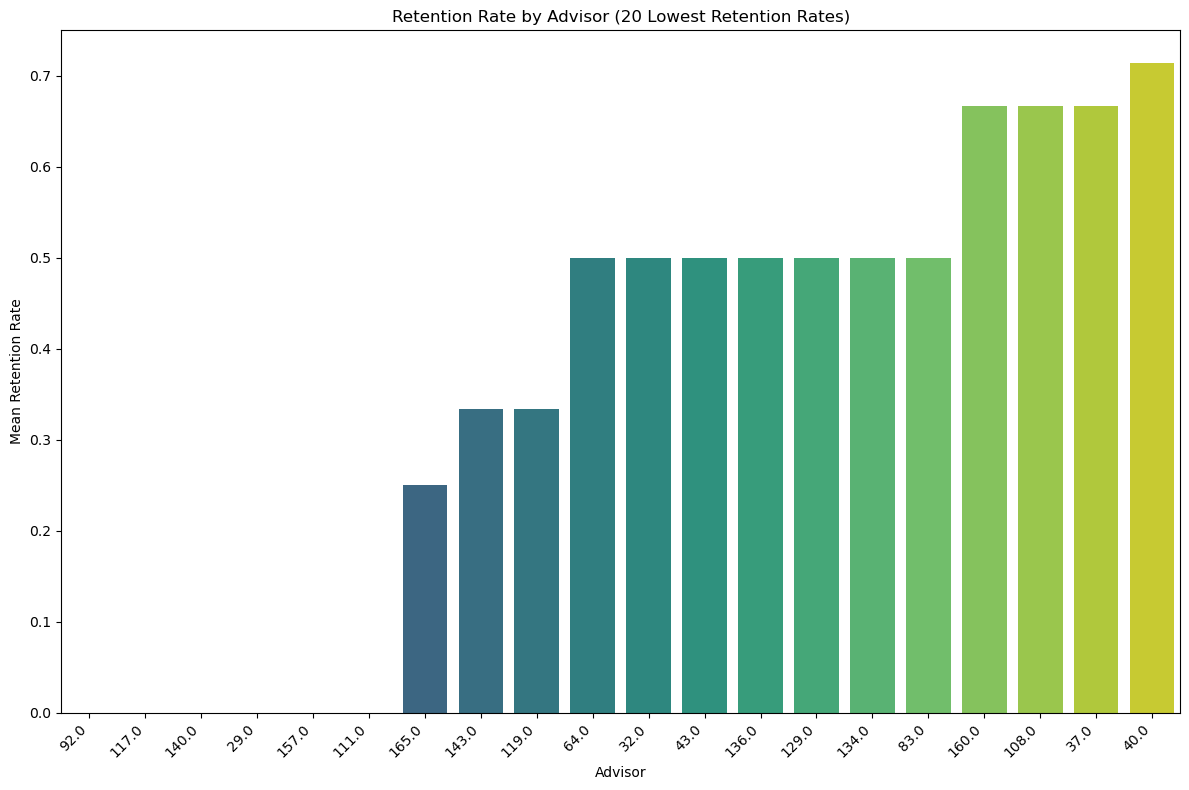

In [65]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate mean retention rate for each advisor
grouped_data = student_df.groupby('Advisor')['1st Year Retention'].mean().reset_index()

# Sort the data by mean retention rate in ascending order and take the bottom 20
lowest_20_advisors = grouped_data.sort_values(by='1st Year Retention', ascending=True).head(20)

# Set up the size of the figure
plt.figure(figsize=(12, 8))

# Create a bar plot using seaborn
sns.barplot(data=lowest_20_advisors, x='Advisor', y='1st Year Retention', order=lowest_20_advisors['Advisor'], palette='viridis')

# Add labels and a title
plt.title('Retention Rate by Advisor (20 Lowest Retention Rates)')
plt.xlabel('Advisor')
plt.ylabel('Mean Retention Rate')

# Improve readability by rotating the x-axis labels if necessary
plt.xticks(rotation=45, ha='right')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


### Many advisors have only a few students... perhaps address these individually

## Look at retention by major

In [66]:
student_df.groupby(['College', 'Major 1'])['1st Year Retention'].agg(['mean', 'count']).sort_values(by='mean', ascending=True).head(10)

mean  count
College Major 1                                             
CAS     International Studies                0.769231     13
        Program on the Environment           0.800000     20
DSB     International Business               0.818182     22
        Information Systems & Ops Mgmt       0.818182     11
CAS     Politics                             0.825000     40
        Digital Journalism                   0.833333      6
        English                              0.840000     25
SEC     Electrical and Computer Engineering  0.846154     13
CAS     Mathematics                          0.846154     13
DSB     Economics                            0.846154     26

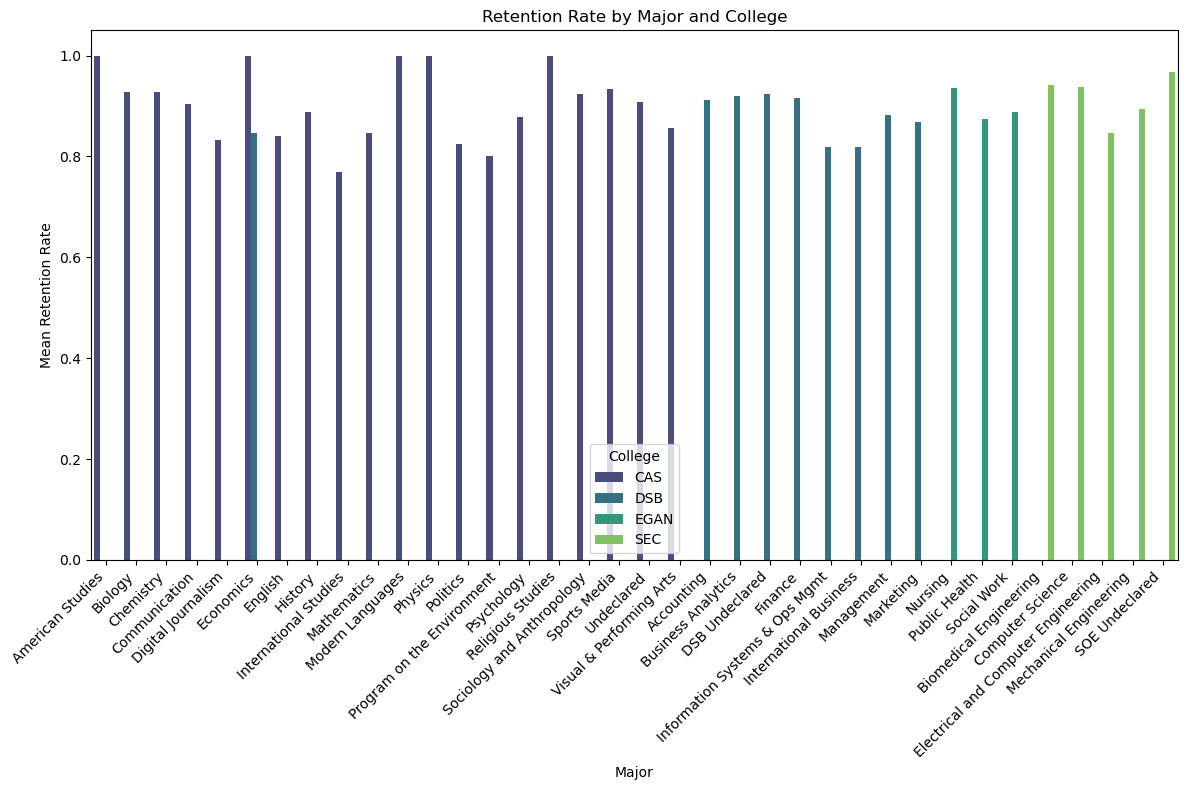

In [67]:
# Calculate mean retention rate for each major grouped by college
grouped_data = student_df.groupby(['College', 'Major 1'])['1st Year Retention'].mean().reset_index()

# Set up the size of the figure
plt.figure(figsize=(12, 8))

# Create a bar plot using seaborn
sns.barplot(data=grouped_data, x='Major 1', y='1st Year Retention', hue='College', dodge=True, palette='viridis')

# Add labels and a title
plt.title('Retention Rate by Major and College')
plt.xlabel('Major')
plt.ylabel('Mean Retention Rate')

# Improve readability by rotating the x-axis labels if there are many categories
plt.xticks(rotation=45, ha='right')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


## GPA distribution for drop outs and retained students

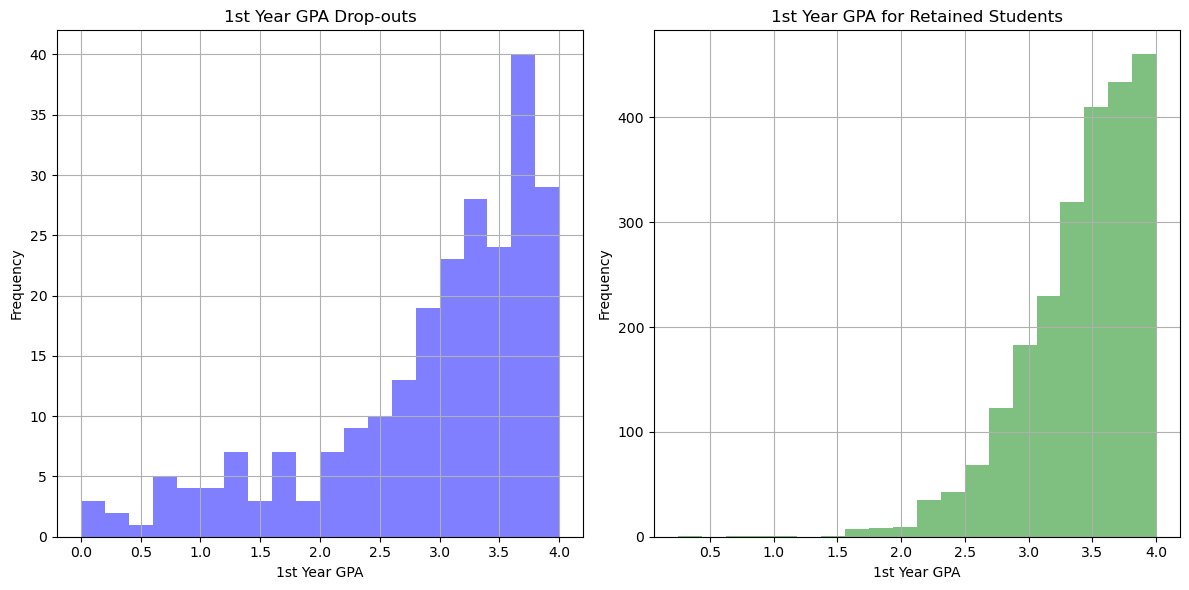

In [68]:
import matplotlib.pyplot as plt
# Filter for drop out and  and retained students
retention_0 = student_df[student_df['1st Year Retention'] == 0]['1st Year GPA']
retention_1 = student_df[student_df['1st Year Retention'] == 1]['1st Year GPA']

# Set up the figure and axes
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot histograms on separate axes
retention_0.hist(ax=axes[0], alpha=0.5, bins=20, color='blue')
retention_1.hist(ax=axes[1], alpha=0.5, bins=20, color='green')

# Adding titles and labels to the first subplot
axes[0].set_title('1st Year GPA Drop-outs')
axes[0].set_xlabel('1st Year GPA')
axes[0].set_ylabel('Frequency')

# Adding titles and labels to the second subplot
axes[1].set_title('1st Year GPA for Retained Students')
axes[1].set_xlabel('1st Year GPA')
axes[1].set_ylabel('Frequency')

# Layout adjustment to prevent overlap
plt.tight_layout()

# Show plot
plt.show()

### There is a clear difference with more left skew for the drop-outs.  Let's do a statistical test to confirm.

t-test is the typical choice for comparing 2 groups, but we need to confirm the assumptions to do that.

In [69]:
from scipy.stats import shapiro

# Test for normality using Shapiro-Wilk test
shapiro_0 = shapiro(retention_0.dropna())
shapiro_1 = shapiro(retention_1.dropna())

shapiro_0, shapiro_1


(ShapiroResult(statistic=0.8701900243759155, pvalue=1.918288797123427e-13),
 ShapiroResult(statistic=0.9135293364524841, pvalue=1.4884846449968472e-34))

#### low p-values for both drop-out and retained indicates that both distributions are not normally distributed

In [70]:
from scipy.stats import levene

# Test for equal variances
levene_test = levene(retention_0.dropna(), retention_1.dropna())

levene_test

LeveneResult(statistic=203.88970057513572, pvalue=1.4264762411972885e-44)

#### low p-values for both drop-out and retained indicates that both distributions do not have equal variances.

### The results suggest that the GPA data does not follow a normal distribution and does not exhibit homogeneity of variances. Therefore, we'll use the Mann-Whitney U test instead of the t-test for our analysis.

In [71]:
from scipy.stats import mannwhitneyu

# Mann-Whitney U test
mwu_test = mannwhitneyu(retention_0.dropna(), retention_1.dropna())

mwu_test


MannwhitneyuResult(statistic=201295.5, pvalue=3.4323542242576273e-13)

### The result confirms that there is a statistically significant difference between the distributions of GPA for retained students and those who dropped out.

## Total Earned Hours distribution for drop outs and retained students

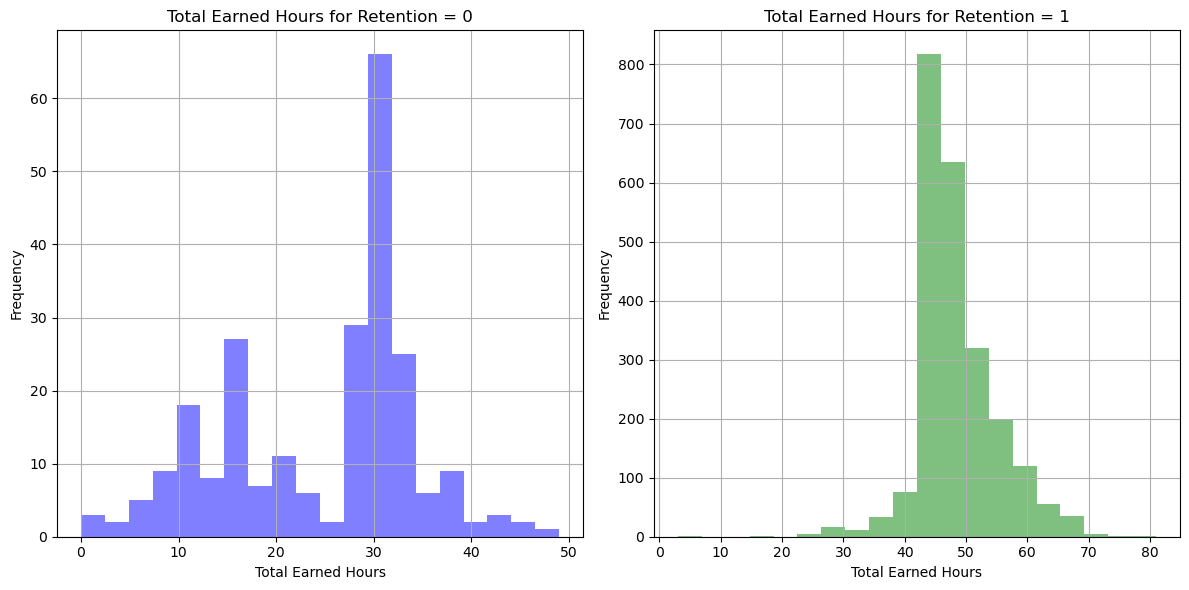

In [72]:
# Filter for 'Total Earned Hours' based on retention status
retention_hours_0 = student_df[student_df['1st Year Retention'] == 0]['Total Earned Hours']
retention_hours_1 = student_df[student_df['1st Year Retention'] == 1]['Total Earned Hours']

# Set up the figure and axes for plotting
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot histograms on separate axes for each group
retention_hours_0.hist(ax=axes[0], alpha=0.5, bins=20, color='blue')
retention_hours_1.hist(ax=axes[1], alpha=0.5, bins=20, color='green')

# Adding titles and labels to the first subplot
axes[0].set_title('Total Earned Hours for Retention = 0')
axes[0].set_xlabel('Total Earned Hours')
axes[0].set_ylabel('Frequency')

# Adding titles and labels to the second subplot
axes[1].set_title('Total Earned Hours for Retention = 1')
axes[1].set_xlabel('Total Earned Hours')
axes[1].set_ylabel('Frequency')

# Layout adjustment to prevent overlap
plt.tight_layout()

# Show plot
plt.show()


In [73]:
# Assuming you have a DataFrame named 'student_df'
retention_hours_0 = student_df[student_df['1st Year Retention'] == 0]['Total Earned Hours']
retention_hours_1 = student_df[student_df['1st Year Retention'] == 1]['Total Earned Hours']
# Normality test for each group
norm_test_0 = shapiro(retention_hours_0.dropna())
norm_test_1 = shapiro(retention_hours_1.dropna())

norm_test_0, norm_test_1

(ShapiroResult(statistic=0.9422091841697693, pvalue=3.6868588182414896e-08),
 ShapiroResult(statistic=0.9233483076095581, pvalue=6.268422808095699e-33))

In [74]:
# Variance equality test
variance_test = levene(retention_hours_0.dropna(), retention_hours_1.dropna())

variance_test

LeveneResult(statistic=92.44022936685066, pvalue=1.5888797127679912e-21)

In [75]:
# Mann-Whitney U test
mwu_test_hours = mannwhitneyu(retention_hours_0.dropna(), retention_hours_1.dropna())

mwu_test_hours

MannwhitneyuResult(statistic=7788.5, pvalue=1.0748202589022822e-138)

### Confirmed significant difference in total earned hours between drop-outs and retained students

## **4. Classification**

### We will now build a model to predict student drop-out

In [76]:
# Importing model selection tools
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

# Importing metrics
from sklearn.metrics import accuracy_score

# Importing model inspection tools
from sklearn.inspection import permutation_importance


In [77]:
# Select categorical columns for one-hot encoding
categorical_cols = ['Cohort', 'SEX', 'Degree', 'Major 1', 'Dorm', 'College']

# Perform one-hot encoding
student_df_encoded = pd.get_dummies(student_df, columns=categorical_cols)

student_df_encoded.shape

(2575, 60)

In [78]:
student_df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2575 entries, 0 to 2583
Data columns (total 60 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   PIDM                                         2575 non-null   int64  
 1   1st Year GPA                                 2575 non-null   float64
 2   1st Year Retention                           2575 non-null   int64  
 3   Total Earned Hours                           2575 non-null   int64  
 4   Advisor                                      2575 non-null   float64
 5   Cohort_202109F                               2575 non-null   uint8  
 6   Cohort_202209F                               2575 non-null   uint8  
 7   SEX_F                                        2575 non-null   uint8  
 8   SEX_M                                        2575 non-null   uint8  
 9   Degree_BA                                    2575 non-null   uint8  
 10  

In [79]:
student_df_encoded['1st Year Retention'].value_counts()

1    2334
0     241
Name: 1st Year Retention, dtype: int64

In [80]:
features = student_df_encoded.columns[(student_df_encoded.columns != 'PIDM') & (student_df_encoded.columns != '1st Year Retention')]
target = "1st Year Retention"

X = student_df_encoded[features]
y = student_df_encoded[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((2060, 58), (2060,), (515, 58), (515,))

#### Functions to help with model selection and parameter tuning.  

In [81]:
cv = 5
summary = dict()

important_features = dict()

important_features_permutation = dict()

In [82]:
from sklearn import metrics

def train_test2(X_train, X_test, y_train, y_test, param_grid, clf):
    clf.fit(X_train, y_train)

    print("*** Parameter estimation results: ")
    print(clf.cv_results_)
    print()

    print("*** Grid scores: ")
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    params = clf.cv_results_['params']

    for mean, std, param in zip(means, stds, params):
        print(f"{round(mean, 3)} (+/-{round(std*2, 3)}) for {param}")
    print()

    print("*** Highest accuracy score: ")
    print(f"{round(clf.best_score_, 3)}")
    print()

    print("*** Best parameters set found: ")
    print(clf.best_params_)
    print()

    y_true, y_pred = y_test, clf.predict(X_test)

    print("*** Classification report for the best parameters set: ")
    print(metrics.classification_report(y_true, y_pred))
    print()

    print("*** Confusion matrix for the best parameters set: ")
    print(metrics.confusion_matrix(y_true, y_pred))
    print()

    print("*** Final accuracy score: ")
    test_score = round(clf.score(X_test, y_test), 3)
    print(test_score)

    return clf, test_score

def calculate_permutation_importance(model, X_test, y_test, model_name, important_features_permutation,
                                     feature_names=None, n_repeats=10, random_state=42):

    if feature_names is None:
        feature_names = X_test.columns if hasattr(X_test, 'columns') else ['Feature {}'.format(i) for i in range(X_test.shape[1])]
    
    # Compute permutation importance
    results = permutation_importance(model, X_test, y_test, n_repeats=n_repeats, random_state=random_state, n_jobs=-1)
    importances = results.importances_mean
    std = results.importances_std
    
    # Sorting the features by importance
    indices = np.argsort(importances)[::-1]
    sorted_feature_names = [feature_names[i] for i in indices]

    # Plotting
    plt.figure(figsize=(12, 8))
    plt.bar(range(len(importances)), importances[indices], yerr=std[indices], align='center', color='lightblue', capsize=5)
    plt.xticks(range(len(importances)), sorted_feature_names, rotation=90)
    plt.xlabel('Feature')
    plt.ylabel('Mean decrease in accuracy')
    plt.title('Permutation Importance for ' + model_name)
    plt.tight_layout()
    plt.show()

    # Most important feature
    max_index = np.argmax(importances)
    most_important_feature = feature_names[max_index]
    most_important_value = importances[max_index]
    
    # Update dictionary with most important feature
    important_features_permutation[model_name] = (most_important_feature, most_important_value)
    
    return most_important_feature, most_important_value

In [83]:
important_features

{}

### KNN

In [84]:
param_grid = [{"n_neighbors": [1, 3, 10, 30, 100]}]

from sklearn.neighbors import KNeighborsClassifier
knc = GridSearchCV(KNeighborsClassifier(), param_grid, cv=cv)

knc, score = train_test2(X_train, X_test, y_train, y_test, param_grid, knc)

summary["k-NNs"] = score


*** Parameter estimation results: 
{'mean_fit_time': array([0.00300684, 0.00329328, 0.00270138, 0.00345988, 0.00353327]), 'std_fit_time': array([0.00063069, 0.00061833, 0.00087295, 0.00046064, 0.00088553]), 'mean_score_time': array([0.08224478, 0.02386575, 0.02208123, 0.02750769, 0.03124523]), 'std_score_time': array([0.12876388, 0.00543601, 0.00466058, 0.0039686 , 0.00540513]), 'param_n_neighbors': masked_array(data=[1, 3, 10, 30, 100],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'n_neighbors': 1}, {'n_neighbors': 3}, {'n_neighbors': 10}, {'n_neighbors': 30}, {'n_neighbors': 100}], 'split0_test_score': array([0.97572816, 0.98058252, 0.97572816, 0.96601942, 0.92718447]), 'split1_test_score': array([0.97330097, 0.98058252, 0.97815534, 0.96359223, 0.92475728]), 'split2_test_score': array([0.97572816, 0.97087379, 0.97330097, 0.94902913, 0.91262136]), 'split3_test_score': array([0.97087379, 0.96116505, 0.96359223, 0.9

Permutation importance can be used with any model, unlike other methods that might be specific to particular types of models.

The permutation_importance function from sklearn.inspection is used to compute the importance of each feature. It does this by measuring the decrease in model accuracy when each feature's values are randomly shuffled. The importance values are averaged over multiple repetitions for stability.

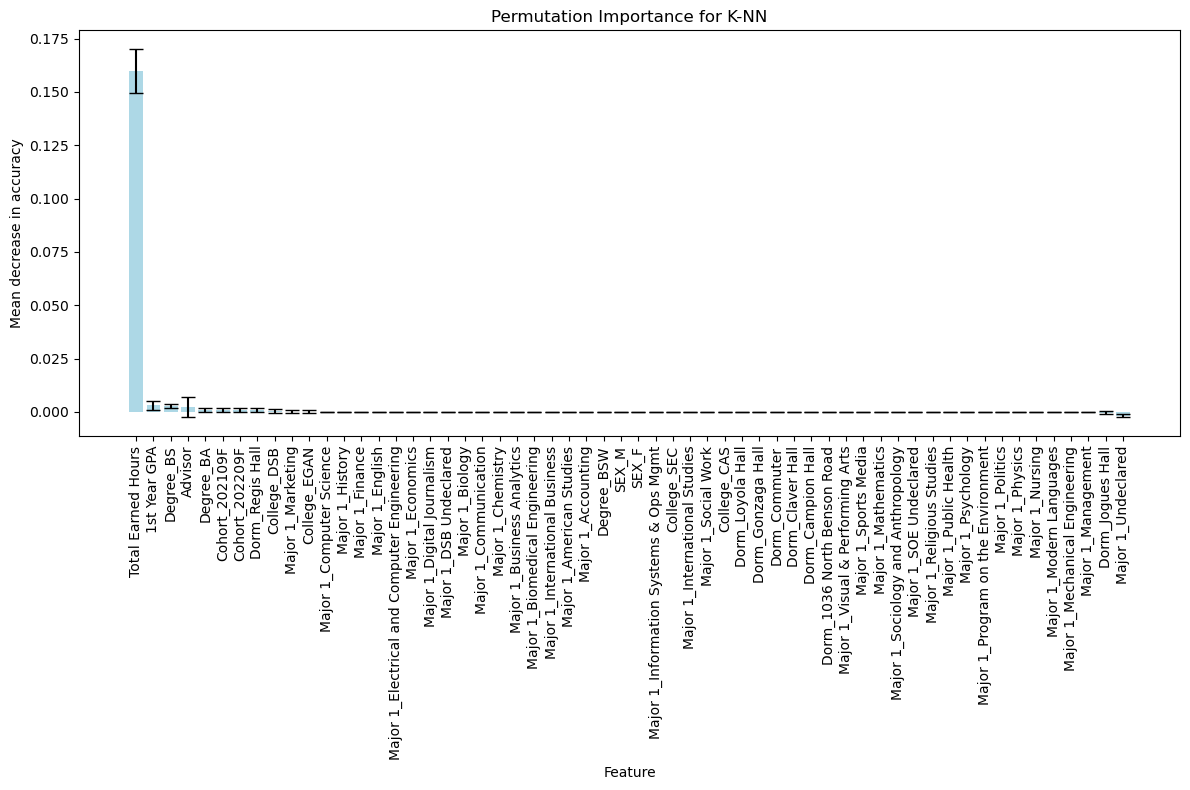

Most important feature: Total Earned Hours
Importance value: 0.15980582524271847
Updated dictionary: {'K-NN': ('Total Earned Hours', 0.15980582524271847)}


In [85]:
# Permutation importance
important_feature, importance_value = calculate_permutation_importance(knc, X_test, y_test, 'K-NN', important_features_permutation)
print("Most important feature:", important_feature)
print("Importance value:", importance_value)
print("Updated dictionary:", important_features_permutation)

### Logistic Regression

In [86]:
param_grid = [{"C": [0.01, 0.03, 0.1, 0.3, 1, 3, 10], "solver": ["lbfgs", "liblinear"]}]

from sklearn.linear_model import LogisticRegression

lr = GridSearchCV(LogisticRegression(), param_grid, cv=cv)
lr, score = train_test2(X_train, X_test, y_train, y_test, param_grid, lr)
summary["Logistic Regression"] = score
summary

C:\Users\12039\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\12039\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

*** Parameter estimation results: 
{'mean_fit_time': array([0.06926274, 0.00683188, 0.05899949, 0.00574126, 0.08004451,
       0.00814767, 0.06626539, 0.00652022, 0.06420732, 0.00810709,
       0.05116334, 0.00694108, 0.04972901, 0.00715289]), 'std_fit_time': array([0.03075063, 0.00325474, 0.0043223 , 0.00112655, 0.0039654 ,
       0.00081687, 0.01633706, 0.00124266, 0.02060983, 0.00219571,
       0.00569281, 0.00138737, 0.00370473, 0.00078233]), 'mean_score_time': array([0.0038455 , 0.00182395, 0.00297694, 0.00186505, 0.00398712,
       0.00281496, 0.00273852, 0.00182424, 0.00276275, 0.00273304,
       0.00220356, 0.00228286, 0.00205498, 0.0021934 ]), 'std_score_time': array([0.00092062, 0.00041583, 0.00044327, 0.00043327, 0.00046943,
       0.00065586, 0.00114226, 0.00041089, 0.00099677, 0.00039012,
       0.00039777, 0.00056806, 0.00056486, 0.00099884]), 'param_C': masked_array(data=[0.01, 0.01, 0.03, 0.03, 0.1, 0.1, 0.3, 0.3, 1, 1, 3, 3,
                   10, 10],
             mas

C:\Users\12039\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



{'k-NNs': 0.977, 'Logistic Regression': 0.981}

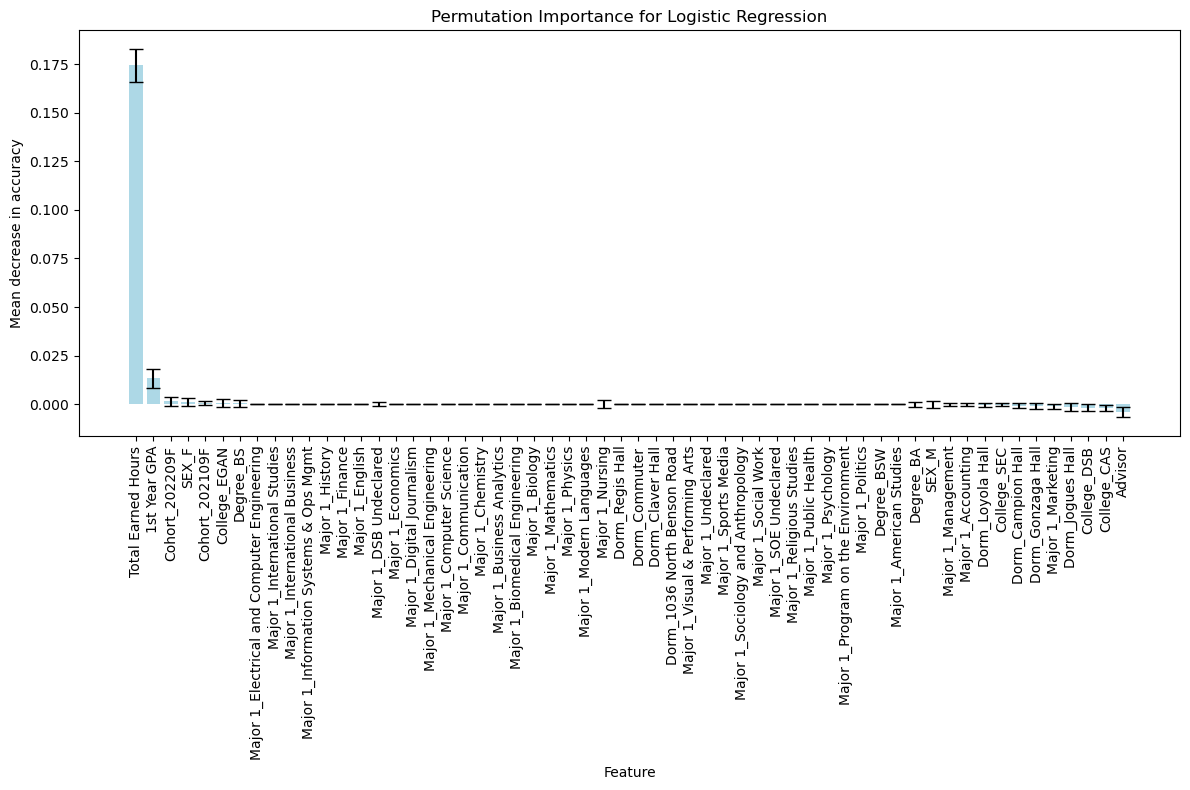

Most important feature: Total Earned Hours
Importance value: 0.17436893203883497
Updated dictionary: {'K-NN': ('Total Earned Hours', 0.15980582524271847), 'Logistic Regression': ('Total Earned Hours', 0.17436893203883497)}


In [87]:
important_feature, importance_value = calculate_permutation_importance(lr, X_test, y_test, 'Logistic Regression', important_features_permutation)
print("Most important feature:", important_feature)
print("Importance value:", importance_value)
print("Updated dictionary:", important_features_permutation)

Logistic Regression uses Coefficients so we can also rank the coefficients to see what if effecting the model

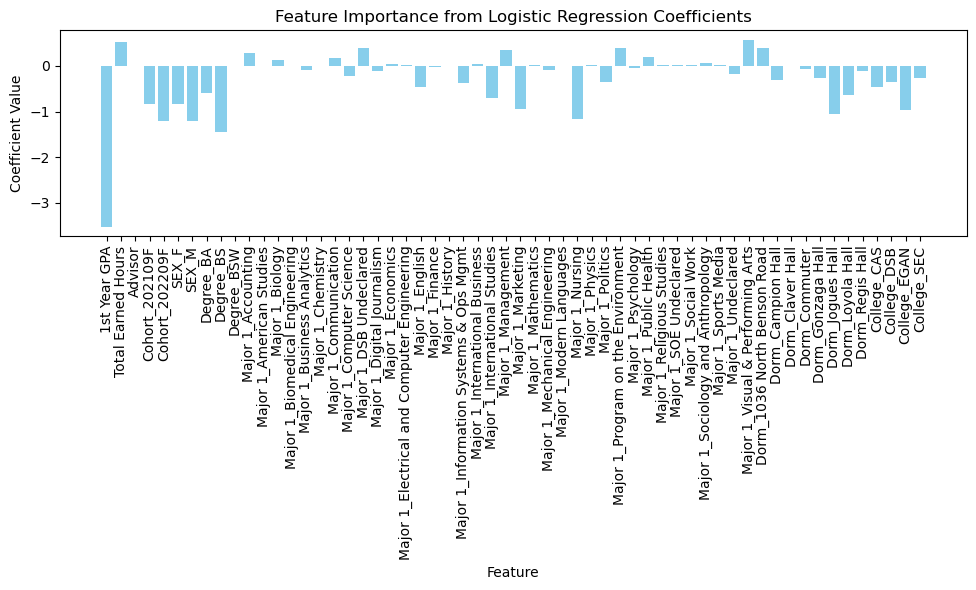

In [88]:
feature_names = X.columns if hasattr(X, 'columns') else ['Feature {}'.format(i) for i in range(X.shape[1])]

best_log_reg = lr.best_estimator_
coefficients_lr = best_log_reg.coef_[0]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), coefficients_lr, color='skyblue')
plt.xticks(range(X.shape[1]), feature_names, rotation=90)  
plt.xlabel('Feature')
plt.ylabel('Coefficient Value')
plt.title('Feature Importance from Logistic Regression Coefficients')
plt.tight_layout()
plt.show()

# Most important feature
max_coef_index = np.argmax(np.abs(coefficients_lr))
most_important_feature = features[max_coef_index]
most_important_value = coefficients_lr[max_coef_index]
important_features['Logistic Regression'] = (most_important_feature, most_important_value)

### Decision Tree

In [89]:
param_grid = [{"max_depth": [1, 3, 10, None]}]

from sklearn.tree import DecisionTreeClassifier

dtc = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid, cv=cv)
dtc, score = train_test2(X_train, X_test, y_train, y_test, param_grid, dtc)
summary["Decision Trees"] = score
summary


*** Parameter estimation results: 
{'mean_fit_time': array([0.00473781, 0.00422091, 0.00544133, 0.00532579]), 'std_fit_time': array([0.00189025, 0.00119098, 0.00050869, 0.00028062]), 'mean_score_time': array([0.0016511 , 0.00123692, 0.00123439, 0.00121202]), 'std_score_time': array([0.00055742, 0.00046602, 0.00040253, 0.00039439]), 'param_max_depth': masked_array(data=[1, 3, 10, None],
             mask=[False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'max_depth': 1}, {'max_depth': 3}, {'max_depth': 10}, {'max_depth': None}], 'split0_test_score': array([0.98058252, 0.97815534, 0.97087379, 0.9684466 ]), 'split1_test_score': array([0.98058252, 0.98543689, 0.97815534, 0.97572816]), 'split2_test_score': array([0.9684466 , 0.98058252, 0.98300971, 0.98300971]), 'split3_test_score': array([0.97087379, 0.97087379, 0.97572816, 0.97572816]), 'split4_test_score': array([0.98543689, 0.97572816, 0.97572816, 0.97572816]), 'mean_test_score': array([0.9771844

{'k-NNs': 0.977, 'Logistic Regression': 0.981, 'Decision Trees': 0.984}

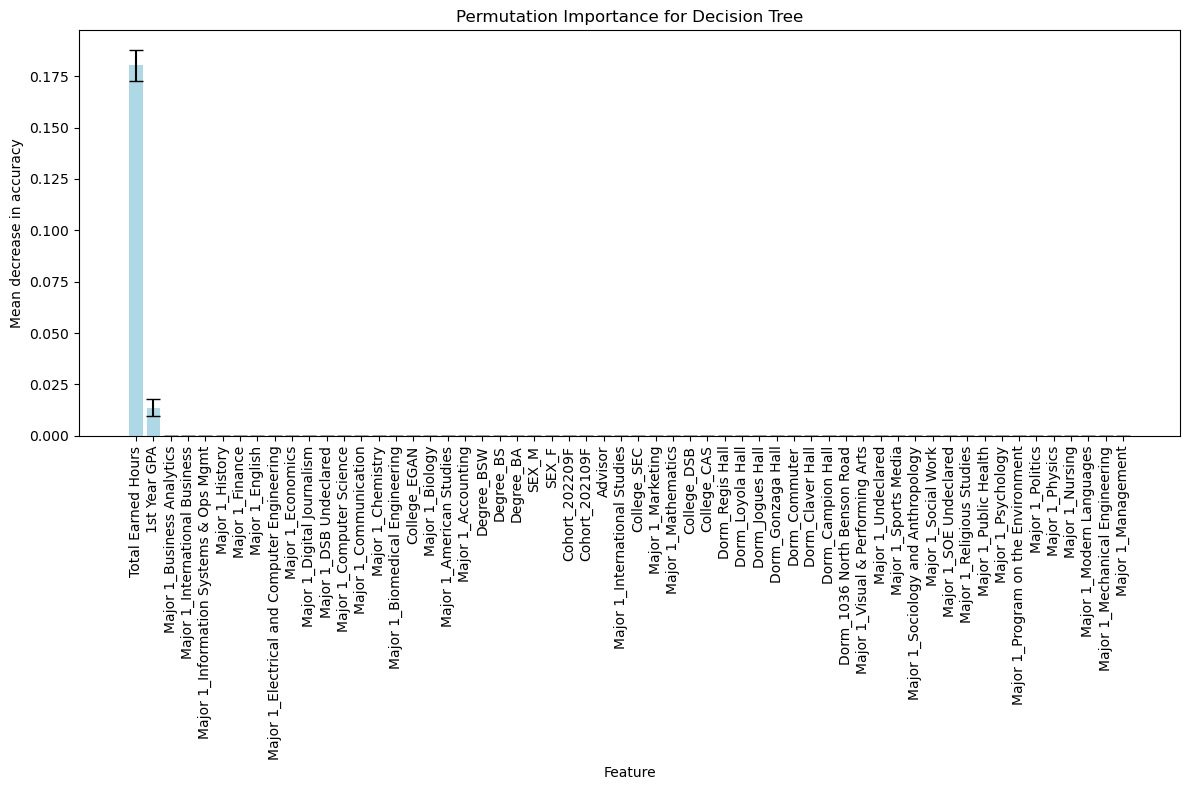

Most important feature: Total Earned Hours
Importance value: 0.1801941747572815
Updated dictionary: {'K-NN': ('Total Earned Hours', 0.15980582524271847), 'Logistic Regression': ('Total Earned Hours', 0.17436893203883497), 'Decision Tree': ('Total Earned Hours', 0.1801941747572815)}


In [90]:
important_feature, importance_value = calculate_permutation_importance(dtc, X_test, y_test, 'Decision Tree', important_features_permutation)
print("Most important feature:", important_feature)
print("Importance value:", importance_value)
print("Updated dictionary:", important_features_permutation)

### Random Forest

In [91]:
param_grid = [{"n_estimators": [1, 3, 10, 30, 100, 300, 1000], "max_depth": [1, 3, 10, None]}]

from sklearn.ensemble import RandomForestClassifier

rfc = GridSearchCV(RandomForestClassifier(random_state=0), param_grid, cv=cv)
rfc, score = train_test2(X_train, X_test, y_train, y_test, param_grid, rfc)
summary["Random Forest"] = score

*** Parameter estimation results: 
{'mean_fit_time': array([0.00625548, 0.00620055, 0.01059422, 0.02544932, 0.0753015 ,
       0.22342305, 0.7342104 , 0.00384479, 0.00535407, 0.0118125 ,
       0.0281229 , 0.08568277, 0.27100463, 0.89413266, 0.00382981,
       0.0064393 , 0.01629081, 0.04202886, 0.13365622, 0.39796004,
       1.32134566, 0.00358148, 0.00686603, 0.01740255, 0.04794383,
       0.16037865, 0.46767602, 1.53364267]), 'std_fit_time': array([0.0023129 , 0.00074935, 0.00090295, 0.00064539, 0.00108118,
       0.00340532, 0.01014012, 0.00058351, 0.00039047, 0.00078291,
       0.00066348, 0.00175339, 0.01232823, 0.0819324 , 0.00021043,
       0.00050828, 0.00106866, 0.00123623, 0.0015174 , 0.00517987,
       0.02014886, 0.00047191, 0.00058743, 0.00059136, 0.00154862,
       0.00992739, 0.02150584, 0.01938529]), 'mean_score_time': array([0.0026484 , 0.00189476, 0.00150604, 0.00298977, 0.00528612,
       0.01140761, 0.03412137, 0.00150318, 0.00181265, 0.00194449,
       0.00307865,

Come back to this

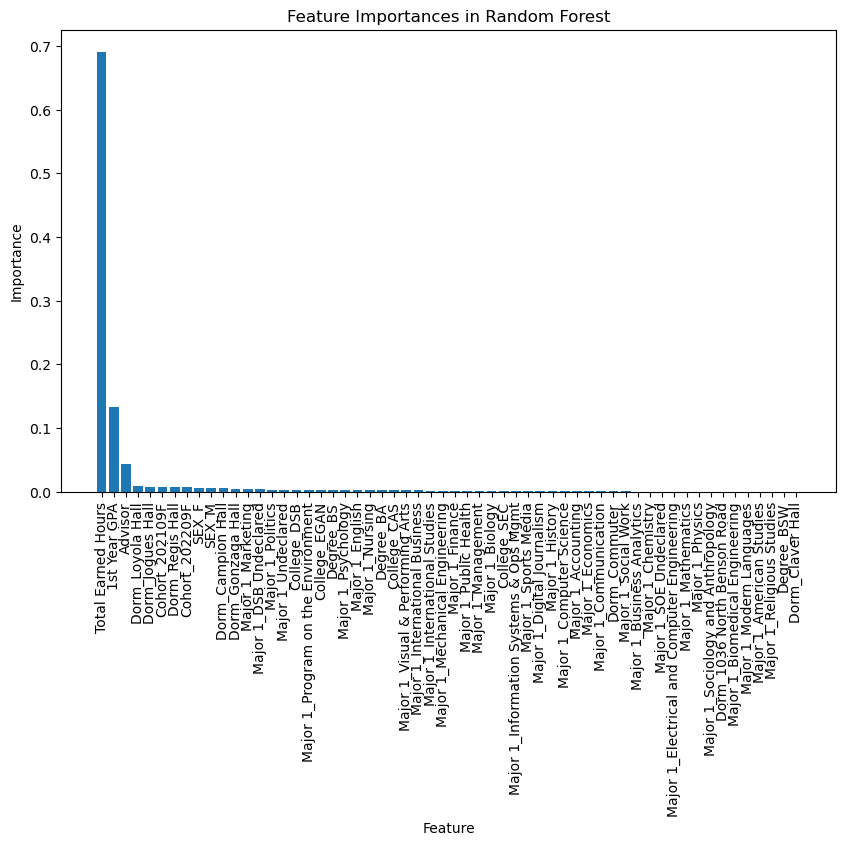

In [92]:
best_rfc = rfc.best_estimator_

# Get feature importances
importances = best_rfc.feature_importances_
indices = np.argsort(importances)[::-1]
sorted_feature_names = [feature_names[i] for i in indices]

# Visualize feature importances
plt.figure(figsize=(10, 6))
plt.title('Feature Importances in Random Forest')
plt.bar(range(len(importances)), importances[indices], align='center')
plt.xticks(range(len(importances)), sorted_feature_names, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()

# Most important feature
max_coef_index = np.argmax(importances)
most_important_feature = feature_names[max_coef_index]
most_important_value = importances[max_coef_index]
important_features['Random Forest'] = (most_important_feature, most_important_value)

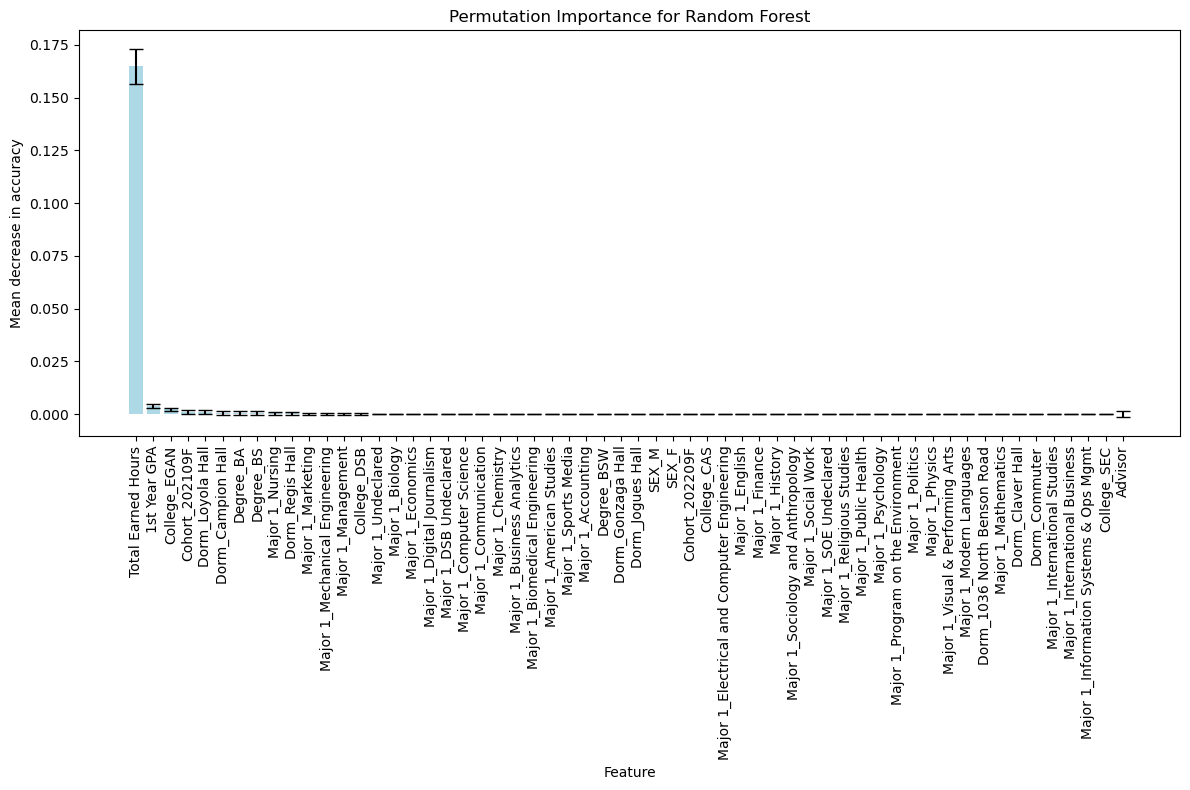

Most important feature: Total Earned Hours
Importance value: 0.1648543689320388
Updated dictionary: {'K-NN': ('Total Earned Hours', 0.15980582524271847), 'Logistic Regression': ('Total Earned Hours', 0.17436893203883497), 'Decision Tree': ('Total Earned Hours', 0.1801941747572815), 'Random Forest': ('Total Earned Hours', 0.1648543689320388)}


In [93]:
important_feature, importance_value = calculate_permutation_importance(rfc, X_test, y_test, 'Random Forest', important_features_permutation)
print("Most important feature:", important_feature)
print("Importance value:", importance_value)
print("Updated dictionary:", important_features_permutation)

### XGBoost

In [94]:
param_grid = [{"reg_alpha": [0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10]}]

from xgboost import XGBClassifier

xgbc = GridSearchCV(XGBClassifier(random_state=0), param_grid, cv=cv)
xgbc, score = train_test2(X_train, X_test, y_train, y_test, param_grid, xgbc)
summary["XGBoost"] = score

*** Parameter estimation results: 
{'mean_fit_time': array([0.11894126, 0.10371132, 0.10476522, 0.10128527, 0.10624795,
       0.10709624, 0.08653612, 0.08069324, 0.07603316]), 'std_fit_time': array([0.01119549, 0.01182513, 0.01425896, 0.01211771, 0.01361193,
       0.0099891 , 0.00699467, 0.00624246, 0.0057477 ]), 'mean_score_time': array([0.0135705 , 0.01192703, 0.01271706, 0.01297426, 0.01299787,
       0.01286688, 0.01281147, 0.01218886, 0.01289048]), 'std_score_time': array([0.00049288, 0.00171866, 0.00037531, 0.00071302, 0.00094151,
       0.00148556, 0.00161489, 0.00110679, 0.00047605]), 'param_reg_alpha': masked_array(data=[0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10],
             mask=[False, False, False, False, False, False, False, False,
                   False],
       fill_value='?',
            dtype=object), 'params': [{'reg_alpha': 0.001}, {'reg_alpha': 0.003}, {'reg_alpha': 0.01}, {'reg_alpha': 0.03}, {'reg_alpha': 0.1}, {'reg_alpha': 0.3}, {'reg_alpha': 1}, {'reg_

Come back to this

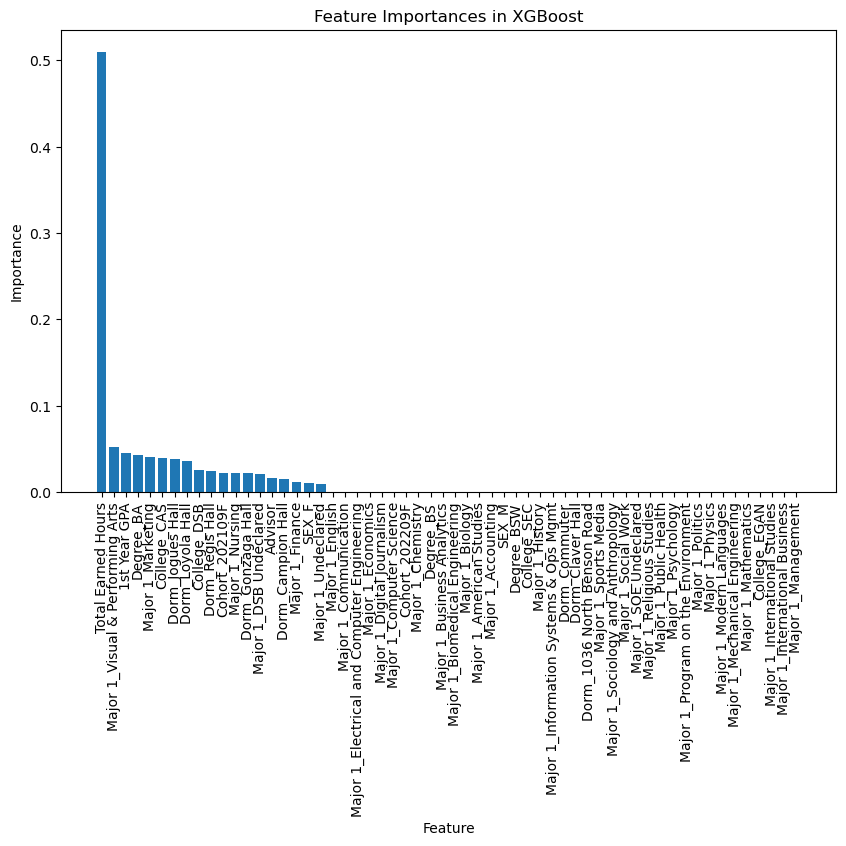

In [95]:

best_xgbc = xgbc.best_estimator_

importances = best_xgbc.feature_importances_
indices = np.argsort(importances)[::-1]
sorted_feature_names = [feature_names[i] for i in indices]

plt.figure(figsize=(10, 6))
plt.title('Feature Importances in XGBoost')
plt.bar(range(len(importances)), importances[indices], align='center')
plt.xticks(range(len(importances)), sorted_feature_names, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()

max_coef_index = np.argmax(importances)
most_important_feature = feature_names[max_coef_index]
most_important_value = importances[max_coef_index]
important_features['XGBoost'] = (most_important_feature, most_important_value)

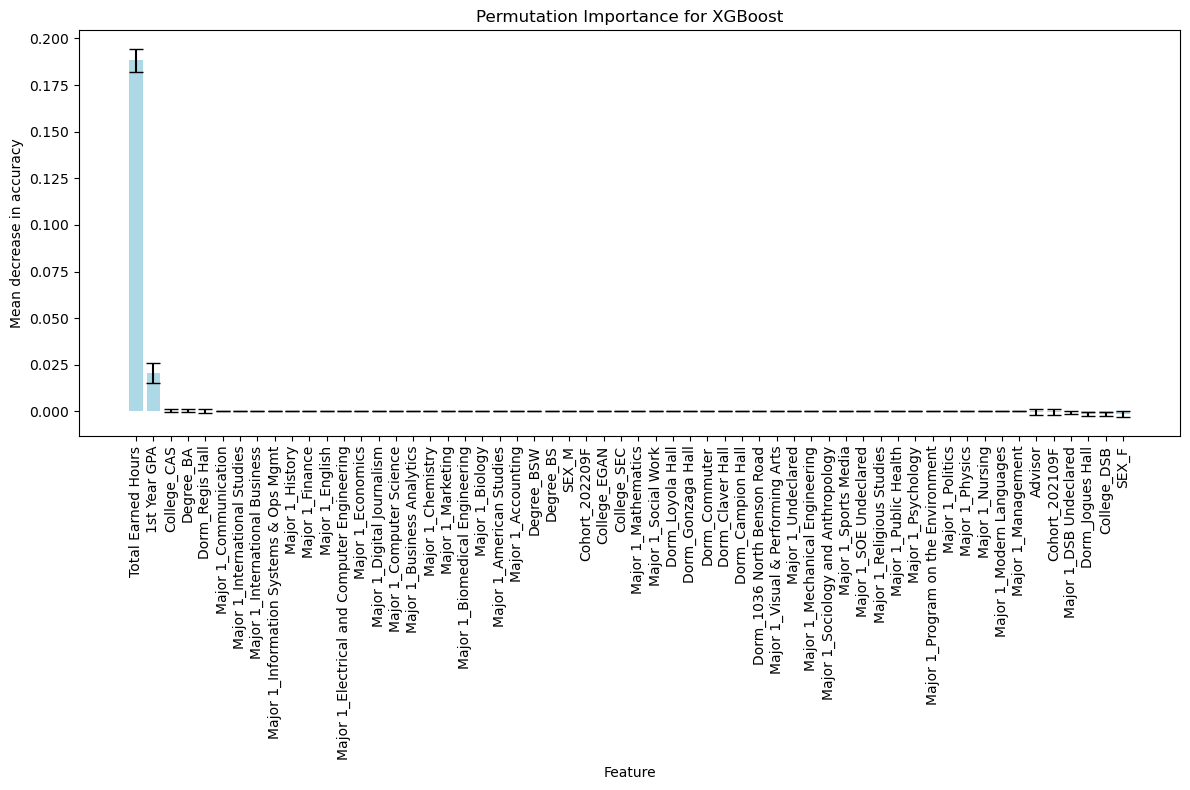

Most important feature: Total Earned Hours
Importance value: 0.1883495145631068


In [96]:
important_feature, importance_value = calculate_permutation_importance(xgbc, X_test, y_test,'XGBoost', important_features_permutation)
print("Most important feature:", important_feature)
print("Importance value:", importance_value)

### Linear SVMs

In [97]:
from sklearn.svm import LinearSVC

param_grid = [{"C": [0.01, 0.03, 0.1, 0.3, 1, 3, 10]}]

lsvc = GridSearchCV(LinearSVC(random_state=0, max_iter=10000), param_grid, cv=cv)
lsvc, score = train_test2(X_train, X_test, y_train, y_test, param_grid, lsvc)
summary["Linear SVMs"] = score

best_lsvc = lsvc.best_estimator_

if hasattr(best_lsvc, "coef_"):
    importances = best_lsvc.coef_[0]
    indices = np.argsort(np.abs(importances))[::-1]
    sorted_feature_names = [feature_names[i] for i in indices]

    max_coef_index = indices[0]
    most_important_feature = feature_names[max_coef_index]
    most_important_value = importances[max_coef_index]
    important_features['Linear SVM'] = (most_important_feature, most_important_value)


C:\Users\12039\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning:

The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.

C:\Users\12039\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning:

The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.

C:\Users\12039\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning:

The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.

C:\Users\12039\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning:

The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitl

*** Parameter estimation results: 
{'mean_fit_time': array([0.0723989 , 0.09940386, 0.0888988 , 0.08496294, 0.08588963,
       0.08977714, 0.09234385]), 'std_fit_time': array([0.00405657, 0.00544525, 0.00836602, 0.01183363, 0.01387285,
       0.01682093, 0.01910206]), 'mean_score_time': array([0.00175896, 0.00200753, 0.00180426, 0.00178475, 0.00197568,
       0.00179253, 0.00213871]), 'std_score_time': array([2.59779273e-04, 6.42732271e-05, 4.03917287e-04, 4.06779028e-04,
       3.13121212e-05, 6.65470453e-04, 7.56521103e-04]), 'param_C': masked_array(data=[0.01, 0.03, 0.1, 0.3, 1, 3, 10],
             mask=[False, False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'C': 0.01}, {'C': 0.03}, {'C': 0.1}, {'C': 0.3}, {'C': 1}, {'C': 3}, {'C': 10}], 'split0_test_score': array([0.97572816, 0.98786408, 0.98786408, 0.98543689, 0.98058252,
       0.98300971, 0.98300971]), 'split1_test_score': array([0.97815534, 0.98786408, 0.98786408, 0.9830

C:\Users\12039\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

C:\Users\12039\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning:

The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.

C:\Users\12039\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



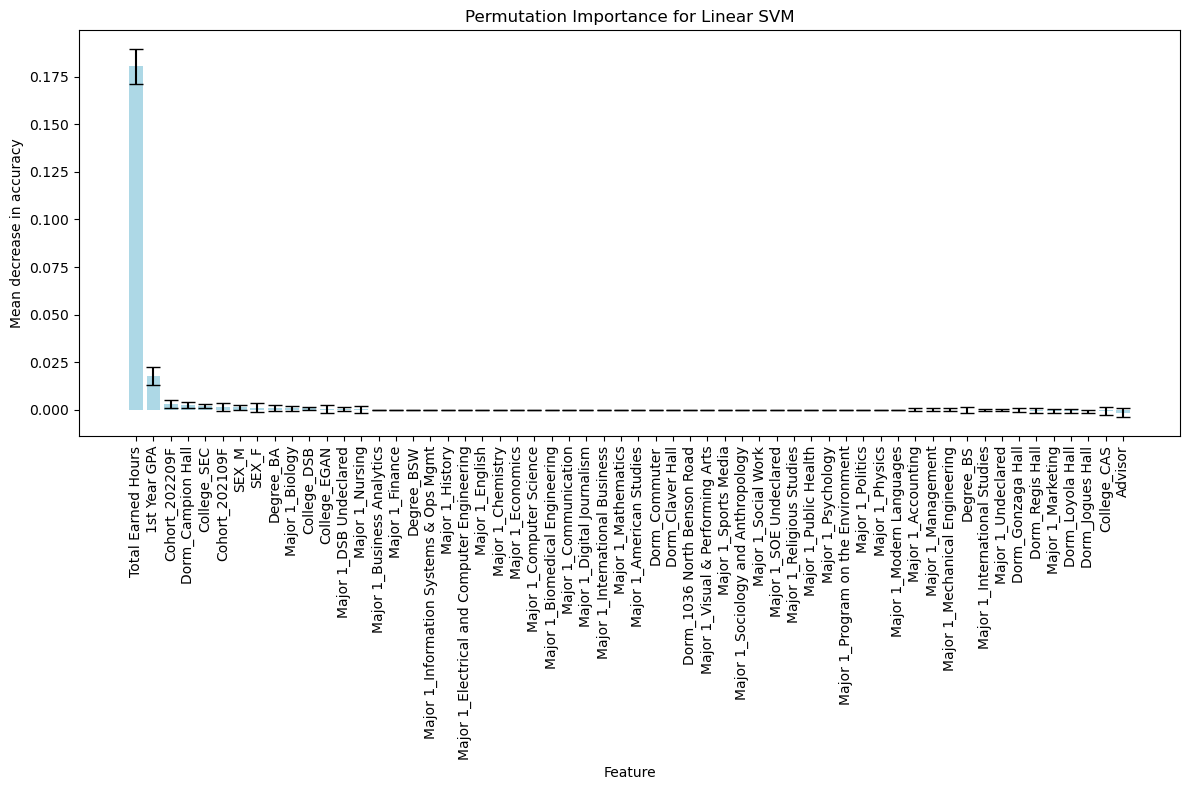

Most important feature: Total Earned Hours
Importance value: 0.18038834951456312


In [98]:
important_feature, importance_value = calculate_permutation_importance(lsvc, X_test, y_test, 'Linear SVM', important_features_permutation)
print("Most important feature:", important_feature)
print("Importance value:", importance_value)

### Kernelized SVMs

In [99]:
param_grid = [{"C": [0.01, 0.03, 0.1, 0.3, 1, 3, 10], "gamma": ["scale", "auto", 0.01, 0.03, 0.1, 0.3, 1, 3, 10]}]

from sklearn.svm import SVC

svc = GridSearchCV(SVC(random_state=0), param_grid, cv=cv)
svc, score = train_test2(X_train, X_test, y_train, y_test, param_grid, svc)
summary["Kernelized SVMs"] = score
summary

*** Parameter estimation results: 
{'mean_fit_time': array([0.02003856, 0.02442617, 0.02111259, 0.03054714, 0.05900512,
       0.10498652, 0.12601228, 0.1286212 , 0.12810068, 0.01820002,
       0.03003526, 0.02332668, 0.0355895 , 0.08114729, 0.1200572 ,
       0.13823586, 0.13229055, 0.13533254, 0.02042933, 0.03330407,
       0.02461801, 0.0440484 , 0.09908166, 0.12807755, 0.15099607,
       0.14420972, 0.13624539, 0.01713524, 0.03469887, 0.0248867 ,
       0.04493451, 0.09292107, 0.13187432, 0.13443823, 0.14632668,
       0.14759541, 0.01336226, 0.03710332, 0.02419109, 0.04562922,
       0.11605921, 0.13487959, 0.14093623, 0.14359179, 0.14067054,
       0.01274538, 0.02993712, 0.02164907, 0.04063492, 0.11383839,
       0.14162192, 0.14810572, 0.15192642, 0.14641638, 0.01298795,
       0.02695923, 0.0203002 , 0.03795805, 0.11006088, 0.13647728,
       0.14203529, 0.15544405, 0.1520731 ]), 'std_fit_time': array([0.00256261, 0.00017029, 0.00063834, 0.00053834, 0.0008979 ,
       0.001189

{'k-NNs': 0.977,
 'Logistic Regression': 0.981,
 'Decision Trees': 0.984,
 'Random Forest': 0.984,
 'XGBoost': 0.984,
 'Linear SVMs': 0.984,
 'Kernelized SVMs': 0.979}

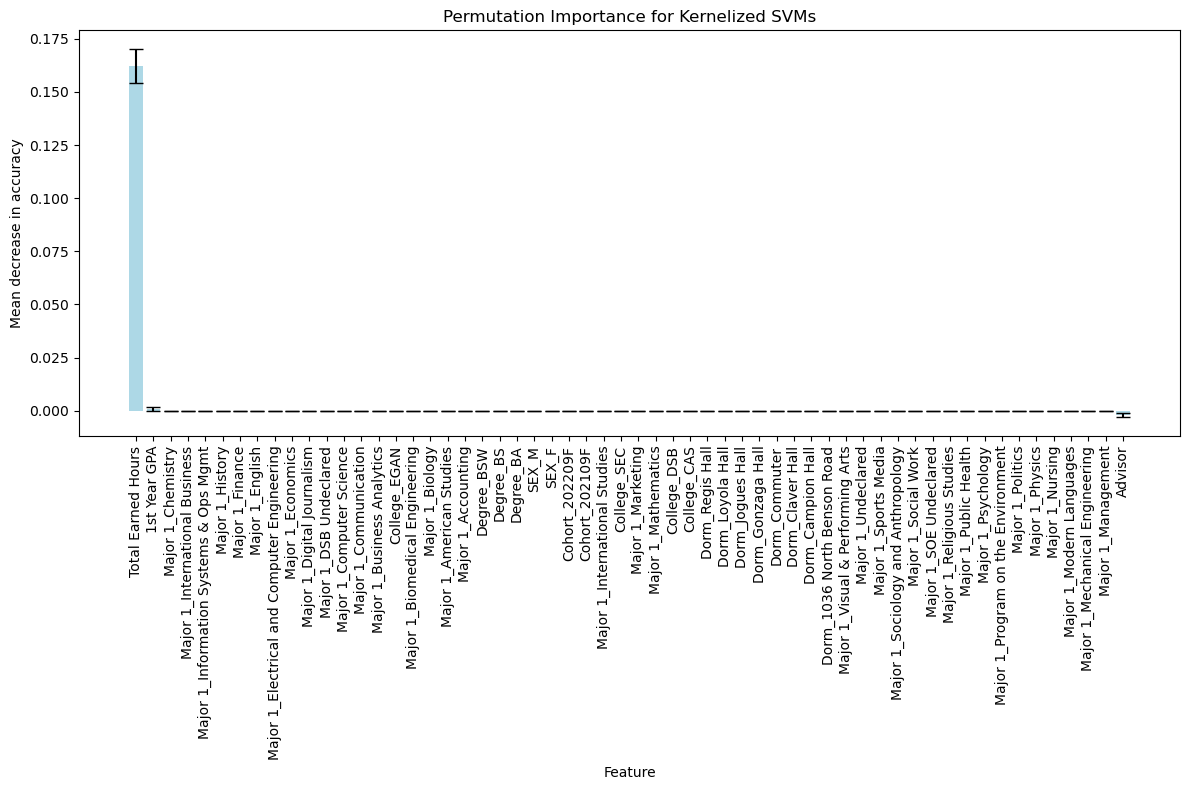

Most important feature: Total Earned Hours
Importance value: 0.1621359223300971


In [100]:
important_feature, importance_value = calculate_permutation_importance(svc, X_test, y_test, 'Kernelized SVMs', important_features_permutation)
print("Most important feature:", important_feature)
print("Importance value:", importance_value)

### Neural Networks

In [101]:
param_grid = [{"hidden_layer_sizes": [(10,), (30,), (100,)], "solver": ["lbfgs", "sgd", "adam"]}]

from sklearn.neural_network import MLPClassifier

mlpc = GridSearchCV(MLPClassifier(random_state=0), param_grid, cv=cv)
mlpc, score = train_test2(X_train, X_test, y_train, y_test, param_grid, mlpc)
summary["Neural Networks"] = score
summary

C:\Users\12039\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

C:\Users\12039\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

C:\Users\12039\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increa

*** Parameter estimation results: 
{'mean_fit_time': array([0.20868807, 0.5035882 , 0.5382853 , 0.28834257, 0.6148366 ,
       0.6412303 , 1.03275075, 0.98425364, 0.99455118]), 'std_fit_time': array([0.03299062, 0.02857473, 0.03675114, 0.00881807, 0.01513843,
       0.02030085, 0.08451619, 0.06934083, 0.03208533]), 'mean_score_time': array([0.0020216 , 0.00183101, 0.00156446, 0.00210533, 0.00160489,
       0.0017488 , 0.00225506, 0.00200896, 0.00221181]), 'std_score_time': array([0.00063302, 0.00075407, 0.00046264, 0.00019188, 0.0004899 ,
       0.00040223, 0.00041829, 0.00063421, 0.00041391]), 'param_hidden_layer_sizes': masked_array(data=[(10,), (10,), (10,), (30,), (30,), (30,), (100,),
                   (100,), (100,)],
             mask=[False, False, False, False, False, False, False, False,
                   False],
       fill_value='?',
            dtype=object), 'param_solver': masked_array(data=['lbfgs', 'sgd', 'adam', 'lbfgs', 'sgd', 'adam',
                   'lbfgs', 's

C:\Users\12039\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



{'k-NNs': 0.977,
 'Logistic Regression': 0.981,
 'Decision Trees': 0.984,
 'Random Forest': 0.984,
 'XGBoost': 0.984,
 'Linear SVMs': 0.984,
 'Kernelized SVMs': 0.979,
 'Neural Networks': 0.981}

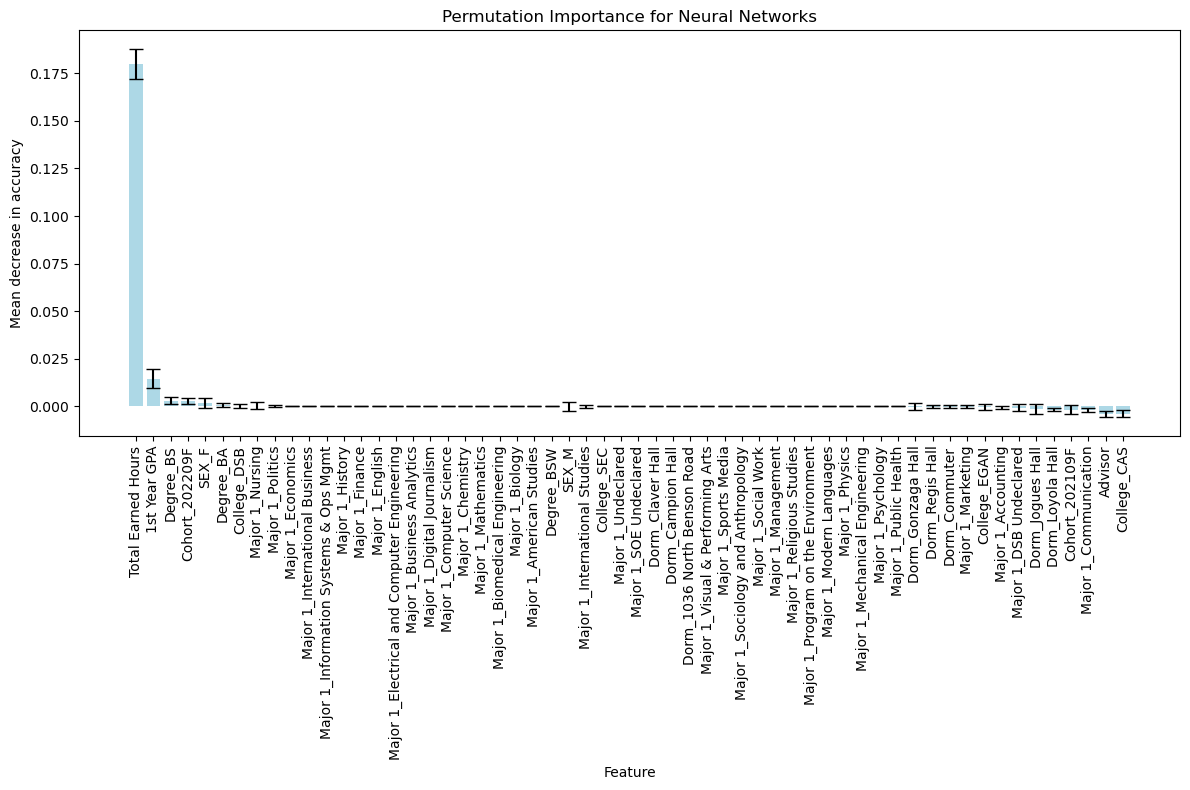

Most important feature: Total Earned Hours
Importance value: 0.18


In [102]:
important_feature, importance_value = calculate_permutation_importance(mlpc, X_test, y_test, 'Neural Networks', important_features_permutation)
print("Most important feature:", important_feature)
print("Importance value:", importance_value)

## Compare and choose model

The Performance of our models. This is based on the accuracy of the models. 

In [103]:
summary

{'k-NNs': 0.977,
 'Logistic Regression': 0.981,
 'Decision Trees': 0.984,
 'Random Forest': 0.984,
 'XGBoost': 0.984,
 'Linear SVMs': 0.984,
 'Kernelized SVMs': 0.979,
 'Neural Networks': 0.981}

All of our models are very close to 1, which is cause for concern that one or more of our features is a telltale sign of retention. We will now look at the feature importances for many of the models.

Feature importance based on the permutation

In [104]:
important_features_permutation_df = important_features_permutation.copy()
important_features_permutation_df = pd.DataFrame(important_features_permutation_df)
important_features_permutation_df.transpose()

,0,1
K-NN,Total Earned Hours,0.159806
Logistic Regression,Total Earned Hours,0.174369
Decision Tree,Total Earned Hours,0.180194
Random Forest,Total Earned Hours,0.164854
XGBoost,Total Earned Hours,0.18835
Linear SVM,Total Earned Hours,0.180388
Kernelized SVMs,Total Earned Hours,0.162136
Neural Networks,Total Earned Hours,0.18


Each of the permutation results point to Total Earned Hours. This is the credit hours earned by a student. You must pass a course to earn the credit hours. 

## Feature Importance

In [105]:
important_features

{'Logistic Regression': ('1st Year GPA', -3.515651941353002),
 'Random Forest': ('Total Earned Hours', 0.6909530884866595),
 'XGBoost': ('Total Earned Hours', 0.5098825),
 'Linear SVM': ('1st Year GPA', -0.9718853474823551)}

Total Earned Hours and 1st Year GPA are the top indicators in our models. We did not get feature importances from all of our models as not all support feature importances. There was enough evidence to adjust our features.

We will now adjust our data by removing these features an see how this effect our model accuracy. 

## Removing Total Earned Hours and re-running

In [106]:
features_trimmed = student_df_encoded.columns[(student_df_encoded.columns != 'PIDM') & 
                                              (student_df_encoded.columns != 'Advisor') & 
                                              (student_df_encoded.columns != '1st Year Retention') &
                                              (student_df_encoded.columns != '1st Year GPA') &
                                              (student_df_encoded.columns != 'Total Earned Hours') #here is where we take out that feature
                                              ]
target = "1st Year Retention"

X = student_df_encoded[features_trimmed]
y = student_df_encoded[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

summary2 = dict()

#KNN
param_grid = [{"n_neighbors": [1, 3, 10, 30, 100]}]
knc = GridSearchCV(KNeighborsClassifier(), param_grid, cv=cv)
knc, score = train_test2(X_train, X_test, y_train, y_test, param_grid, knc)
summary2["k-NNs"] = score

#Logistic Regression
param_grid = [{"C": [0.01, 0.03, 0.1, 0.3, 1, 3, 10], "solver": ["lbfgs", "liblinear"]}]
lr = GridSearchCV(LogisticRegression(), param_grid, cv=cv)
lr, score = train_test2(X_train, X_test, y_train, y_test, param_grid, lr)
summary2["Logistic Regression"] = score

#Decision Trees
param_grid = [{"max_depth": [1, 3, 10, None]}]
dtc = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid, cv=cv)
dtc, score = train_test2(X_train, X_test, y_train, y_test, param_grid, dtc)
summary2["Decision Trees"] = score

#Random Forest
param_grid = [{"n_estimators": [1, 3, 10, 30, 100, 300, 1000], "max_depth": [1, 3, 10, None]}]
rfc = GridSearchCV(RandomForestClassifier(random_state=0), param_grid, cv=cv)
rfc, score = train_test2(X_train, X_test, y_train, y_test, param_grid, rfc)
summary2["Random Forest"] = score

#XGBoost
param_grid = [{"reg_alpha": [0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10]}]
xgbc = GridSearchCV(XGBClassifier(random_state=0), param_grid, cv=cv)
xgbc, score = train_test2(X_train, X_test, y_train, y_test, param_grid, xgbc)
summary2["XGBoost"] = score

#Linear SVMs
param_grid = [{"C": [0.01, 0.03, 0.1, 0.3, 1, 3, 10]}]
lsvc = GridSearchCV(LinearSVC(random_state=0, max_iter=10000), param_grid, cv=cv)
lsvc, score = train_test2(X_train, X_test, y_train, y_test, param_grid, lsvc)
summary2["Linear SVMs"] = score

#Kernelized SVMs
param_grid = [{"C": [0.01, 0.03, 0.1, 0.3, 1, 3, 10], "gamma": ["scale", "auto", 0.01, 0.03, 0.1, 0.3, 1, 3, 10]}]
svc = GridSearchCV(SVC(random_state=0), param_grid, cv=cv)
svc, score = train_test2(X_train, X_test, y_train, y_test, param_grid, svc)
summary2["Kernelized SVMs"] = score

#Neural Networks
param_grid = [{"hidden_layer_sizes": [(10,), (30,), (100,)], "solver": ["lbfgs", "sgd", "adam"]}]
mlpc = GridSearchCV(MLPClassifier(random_state=0), param_grid, cv=cv)
mlpc, score = train_test2(X_train, X_test, y_train, y_test, param_grid, mlpc)
summary2["Neural Networks"] = score


*** Parameter estimation results: 
{'mean_fit_time': array([0.00209341, 0.00139914, 0.0018177 , 0.00163727, 0.00178638]), 'std_fit_time': array([0.00069857, 0.00049402, 0.00041093, 0.00047146, 0.00039363]), 'mean_score_time': array([0.01493983, 0.01486807, 0.01744218, 0.01815524, 0.0189724 ]), 'std_score_time': array([0.00263386, 0.00056103, 0.00049756, 0.00041394, 0.00051129]), 'param_n_neighbors': masked_array(data=[1, 3, 10, 30, 100],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'n_neighbors': 1}, {'n_neighbors': 3}, {'n_neighbors': 10}, {'n_neighbors': 30}, {'n_neighbors': 100}], 'split0_test_score': array([0.8907767 , 0.90048544, 0.90776699, 0.90776699, 0.90776699]), 'split1_test_score': array([0.81553398, 0.87864078, 0.90533981, 0.90776699, 0.90776699]), 'split2_test_score': array([0.83495146, 0.89805825, 0.90776699, 0.90776699, 0.90776699]), 'split3_test_score': array([0.81796117, 0.89805825, 0.90776699, 0.9

C:\Users\12039\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\12039\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\12039\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\12039\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\linear_model\_l

*** Parameter estimation results: 
{'mean_fit_time': array([0.00559888, 0.00250735, 0.00739169, 0.0031136 , 0.01203537,
       0.00385509, 0.01362281, 0.00314469, 0.02171564, 0.00368814,
       0.03285313, 0.00431337, 0.03128576, 0.00457187]), 'std_fit_time': array([0.00142759, 0.00045254, 0.00124699, 0.00149277, 0.00143424,
       0.00072244, 0.00073946, 0.00024963, 0.00220817, 0.00048064,
       0.00256633, 0.00035374, 0.00201168, 0.00039322]), 'mean_score_time': array([0.00141306, 0.00142269, 0.00160666, 0.00118585, 0.00136828,
       0.00158343, 0.00162015, 0.00120568, 0.00203109, 0.00109081,
       0.00190911, 0.00119796, 0.00200534, 0.00152574]), 'std_score_time': array([4.91864345e-04, 5.17374368e-04, 4.89372017e-04, 3.70888386e-04,
       4.12030019e-04, 4.63682631e-04, 4.88744308e-04, 4.05805595e-04,
       2.41578147e-05, 1.98635468e-04, 4.93485974e-04, 3.96779824e-04,
       4.03202403e-06, 4.41901401e-04]), 'param_C': masked_array(data=[0.01, 0.01, 0.03, 0.03, 0.1, 0.1, 0.3

C:\Users\12039\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\12039\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\12039\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



*** Parameter estimation results: 
{'mean_fit_time': array([0.00294423, 0.00456266, 0.01097865, 0.02683573, 0.08100672,
       0.23231268, 0.77448897, 0.00298371, 0.0043551 , 0.0100728 ,
       0.0277679 , 0.08510633, 0.25119171, 0.82969522, 0.00314245,
       0.00565228, 0.01486769, 0.04058633, 0.1309474 , 0.38199615,
       1.30729384, 0.00405779, 0.00734792, 0.02068315, 0.05833616,
       0.18927822, 0.57072611, 1.91677766]), 'std_fit_time': array([8.07837004e-04, 4.63794343e-04, 1.31241936e-03, 1.79869315e-03,
       2.46593120e-03, 6.49827151e-03, 3.04733649e-02, 3.26167073e-05,
       2.00851068e-04, 2.02516036e-04, 1.47217723e-03, 3.85467592e-03,
       3.15757409e-03, 3.66389088e-03, 2.37630811e-04, 3.83229684e-04,
       4.44715487e-04, 4.09513448e-04, 2.24933814e-03, 4.71265992e-03,
       9.35723488e-02, 6.09141014e-04, 4.70075749e-04, 8.57156176e-04,
       8.57281133e-04, 1.86665518e-03, 1.00138804e-02, 2.72894934e-02]), 'mean_score_time': array([0.00120459, 0.00134101, 0.

C:\Users\12039\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\12039\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\12039\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



*** Parameter estimation results: 
{'mean_fit_time': array([0.08675861, 0.09703679, 0.0918664 , 0.10085716, 0.09431205,
       0.09869981, 0.07488637, 0.06564035, 0.06776862]), 'std_fit_time': array([0.01160579, 0.01294752, 0.00216086, 0.01152226, 0.0019346 ,
       0.00734379, 0.00595237, 0.00202285, 0.00652256]), 'mean_score_time': array([0.01081495, 0.01172113, 0.01270299, 0.0126833 , 0.01326246,
       0.01225309, 0.01200848, 0.01111727, 0.01229711]), 'std_score_time': array([0.00161269, 0.00108113, 0.00036339, 0.00051147, 0.0031905 ,
       0.00052848, 0.0011252 , 0.00124387, 0.0003747 ]), 'param_reg_alpha': masked_array(data=[0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10],
             mask=[False, False, False, False, False, False, False, False,
                   False],
       fill_value='?',
            dtype=object), 'params': [{'reg_alpha': 0.001}, {'reg_alpha': 0.003}, {'reg_alpha': 0.01}, {'reg_alpha': 0.03}, {'reg_alpha': 0.1}, {'reg_alpha': 0.3}, {'reg_alpha': 1}, {'reg_

C:\Users\12039\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\12039\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\12039\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\12039\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\svm\_classes.py

*** Parameter estimation results: 
{'mean_fit_time': array([0.00630989, 0.00642586, 0.00565472, 0.00717716, 0.01388779,
       0.0311924 , 0.09335585]), 'std_fit_time': array([0.00059469, 0.00038317, 0.00096267, 0.00019425, 0.00330497,
       0.00680595, 0.00230691]), 'mean_score_time': array([0.00260005, 0.00253139, 0.00208464, 0.00248184, 0.00210376,
       0.00156269, 0.00244889]), 'std_score_time': array([0.00048977, 0.00062233, 0.00013493, 0.00114816, 0.00073237,
       0.00041915, 0.00056718]), 'param_C': masked_array(data=[0.01, 0.03, 0.1, 0.3, 1, 3, 10],
             mask=[False, False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'C': 0.01}, {'C': 0.03}, {'C': 0.1}, {'C': 0.3}, {'C': 1}, {'C': 3}, {'C': 10}], 'split0_test_score': array([0.90776699, 0.90776699, 0.90776699, 0.90776699, 0.90776699,
       0.90776699, 0.90776699]), 'split1_test_score': array([0.90776699, 0.90776699, 0.90776699, 0.90776699, 0.90776699,
       0.9

C:\Users\12039\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\12039\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\12039\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\12039\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\neural_network\

*** Parameter estimation results: 
{'mean_fit_time': array([0.16378341, 0.13383894, 0.52918091, 0.24305658, 0.16778975,
       0.63299603, 0.8664279 , 0.34106889, 1.00654116]), 'std_fit_time': array([0.04218861, 0.01175391, 0.01153969, 0.00719959, 0.00574535,
       0.00553088, 0.08142679, 0.03632349, 0.02444694]), 'mean_score_time': array([0.00180378, 0.00133486, 0.00161219, 0.00161119, 0.00181289,
       0.0019145 , 0.00151138, 0.00162568, 0.00162258]), 'std_score_time': array([0.00039837, 0.00040524, 0.0005003 , 0.00049155, 0.0004019 ,
       0.000497  , 0.00045233, 0.00037771, 0.00048144]), 'param_hidden_layer_sizes': masked_array(data=[(10,), (10,), (10,), (30,), (30,), (30,), (100,),
                   (100,), (100,)],
             mask=[False, False, False, False, False, False, False, False,
                   False],
       fill_value='?',
            dtype=object), 'param_solver': masked_array(data=['lbfgs', 'sgd', 'adam', 'lbfgs', 'sgd', 'adam',
                   'lbfgs', 's

C:\Users\12039\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

C:\Users\12039\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\12039\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\12039\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning:

Pr

Summary2 is the model performances with our Total Earned Hours

In [107]:
summary2

{'k-NNs': 0.901,
 'Logistic Regression': 0.901,
 'Decision Trees': 0.901,
 'Random Forest': 0.901,
 'XGBoost': 0.901,
 'Linear SVMs': 0.901,
 'Kernelized SVMs': 0.901,
 'Neural Networks': 0.901}

It look like the model is still preforming will. We can check the permutation again to see what feature is driving this. 

### It appears that the models are all predicting retention (as evident in the confusion matrices).  This is why the accuracy is the same across all of them.  While the score looks to be "high" it's actually just a reflextion of the high proportion of students that stayed = 91%

# Note for Nick and Chris - should we remove the following part since the accuracy of 91% is really just the retention rate?  It looks like without the credit hours we don't have much of an indicator of drop-out.  I would say that if students have low credit hours within the first semseter resources should be allocated to address them and attempt to get them to increase hours for the second semester and make sure they are happy at Fairfield.

In [112]:
important_features_permutation2 = {}

In [109]:
param_grid = [{"C": [0.01, 0.03, 0.1, 0.3, 1, 3, 10], "solver": ["lbfgs", "liblinear"]}]
lr = GridSearchCV(LogisticRegression(), param_grid, cv=cv)
lr, score = train_test2(X_train, X_test, y_train, y_test, param_grid, lr)
summary2["Logistic Regression"] = score

C:\Users\12039\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\12039\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

*** Parameter estimation results: 
{'mean_fit_time': array([0.00761747, 0.00283613, 0.00719733, 0.00287957, 0.01057563,
       0.00297189, 0.01620164, 0.00349531, 0.01969857, 0.00347633,
       0.03095822, 0.00365686, 0.03410249, 0.00492449]), 'std_fit_time': array([0.00189517, 0.00041151, 0.00094453, 0.00033519, 0.00069761,
       0.00011737, 0.00195455, 0.00045782, 0.00072606, 0.00045183,
       0.00131809, 0.00054909, 0.00229611, 0.00020363]), 'mean_score_time': array([0.0018013 , 0.00138049, 0.00133047, 0.00113363, 0.00149693,
       0.00141349, 0.00100818, 0.00127621, 0.00139832, 0.00126348,
       0.00170832, 0.00149341, 0.00172825, 0.00123   ]), 'std_score_time': array([4.00330890e-04, 4.74300202e-04, 3.90684315e-04, 2.79577128e-04,
       4.79232366e-04, 4.82720336e-04, 4.59251371e-06, 4.37759869e-04,
       5.81504664e-04, 3.82569742e-04, 7.71553236e-04, 5.30399271e-04,
       6.06709083e-04, 3.82259118e-04]), 'param_C': masked_array(data=[0.01, 0.01, 0.03, 0.03, 0.1, 0.1, 0.3

C:\Users\12039\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\12039\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

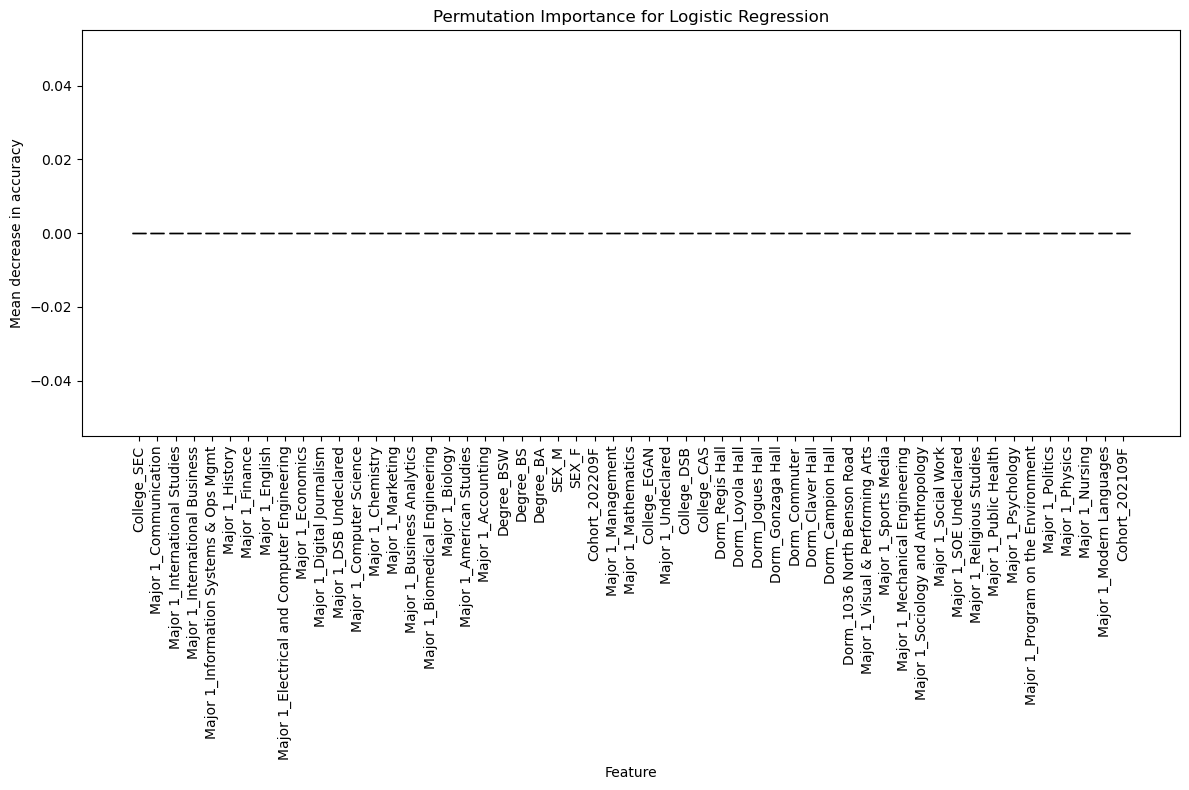

Most important feature: Cohort_202109F
Importance value: 0.0


In [110]:
important_feature, importance_value = calculate_permutation_importance(lr, X_test, y_test, 'Logistic Regression', important_features_permutation2)
print("Most important feature:", important_feature)
print("Importance value:", importance_value)

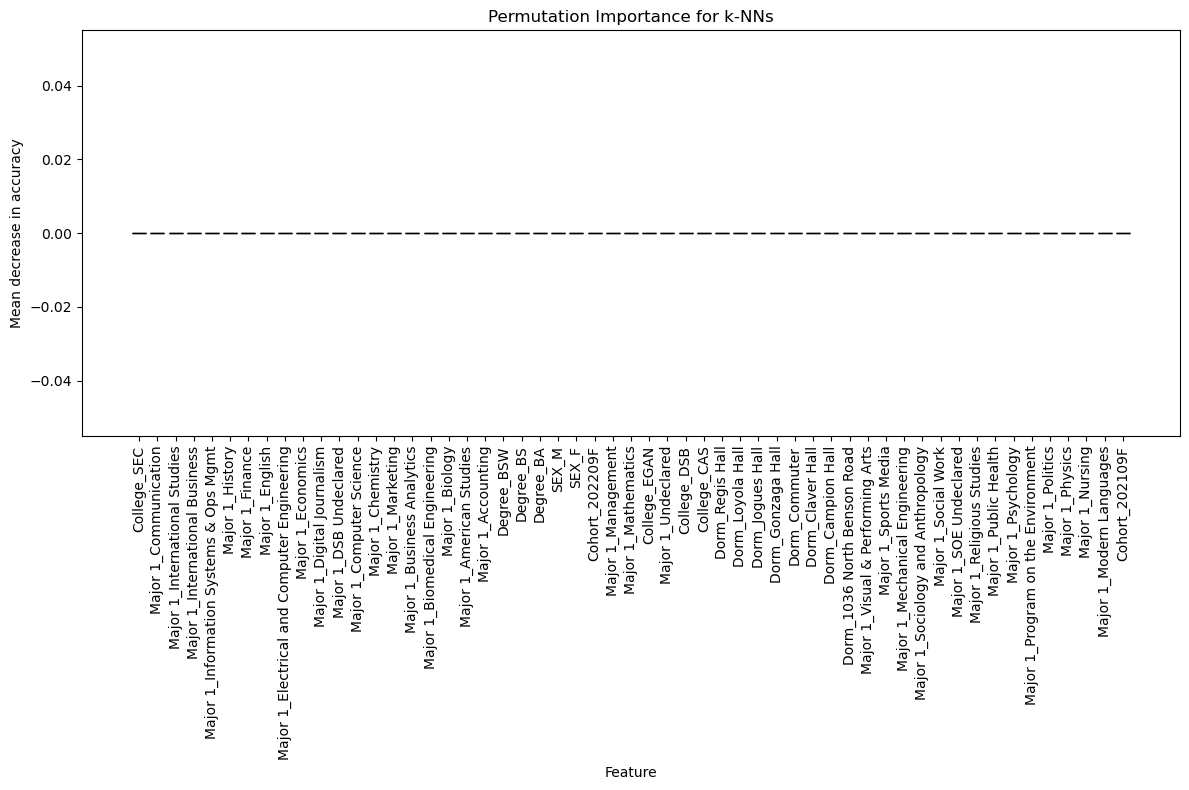

Most important feature: Cohort_202109F
Importance value: 0.0


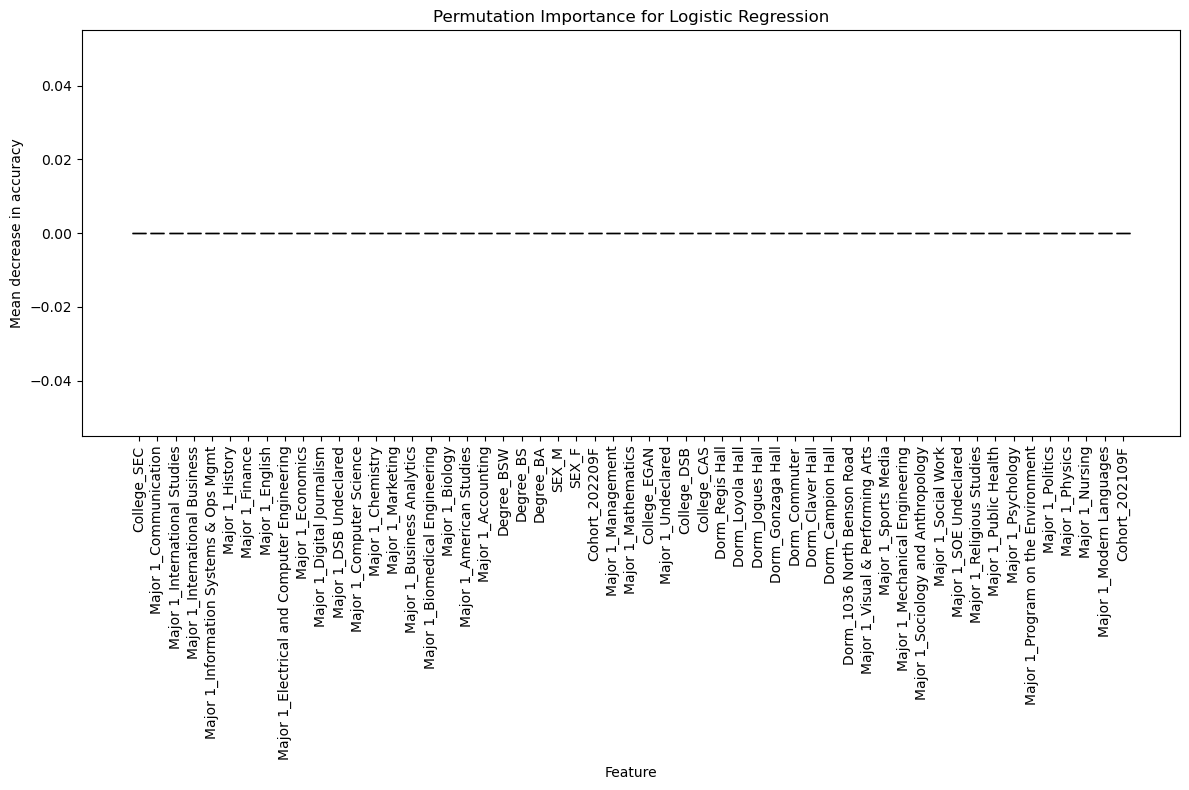

Most important feature: Cohort_202109F
Importance value: 0.0


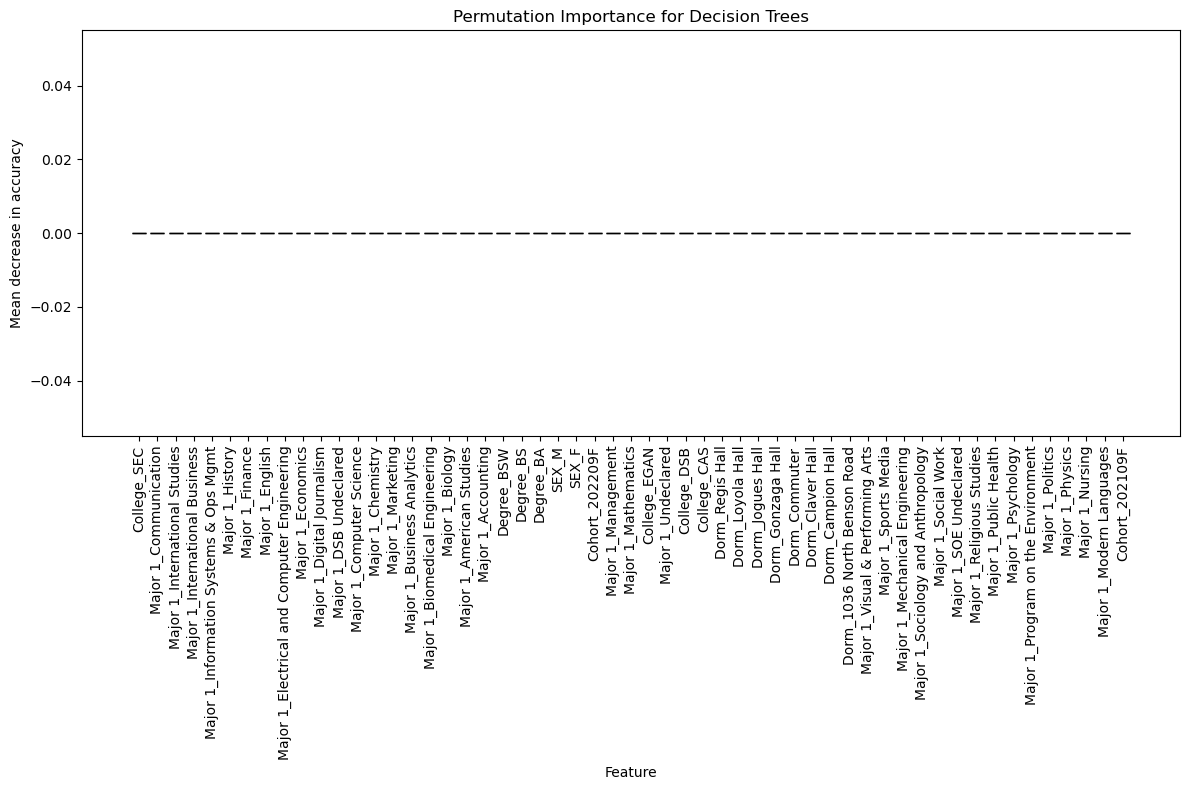

Most important feature: Cohort_202109F
Importance value: 0.0


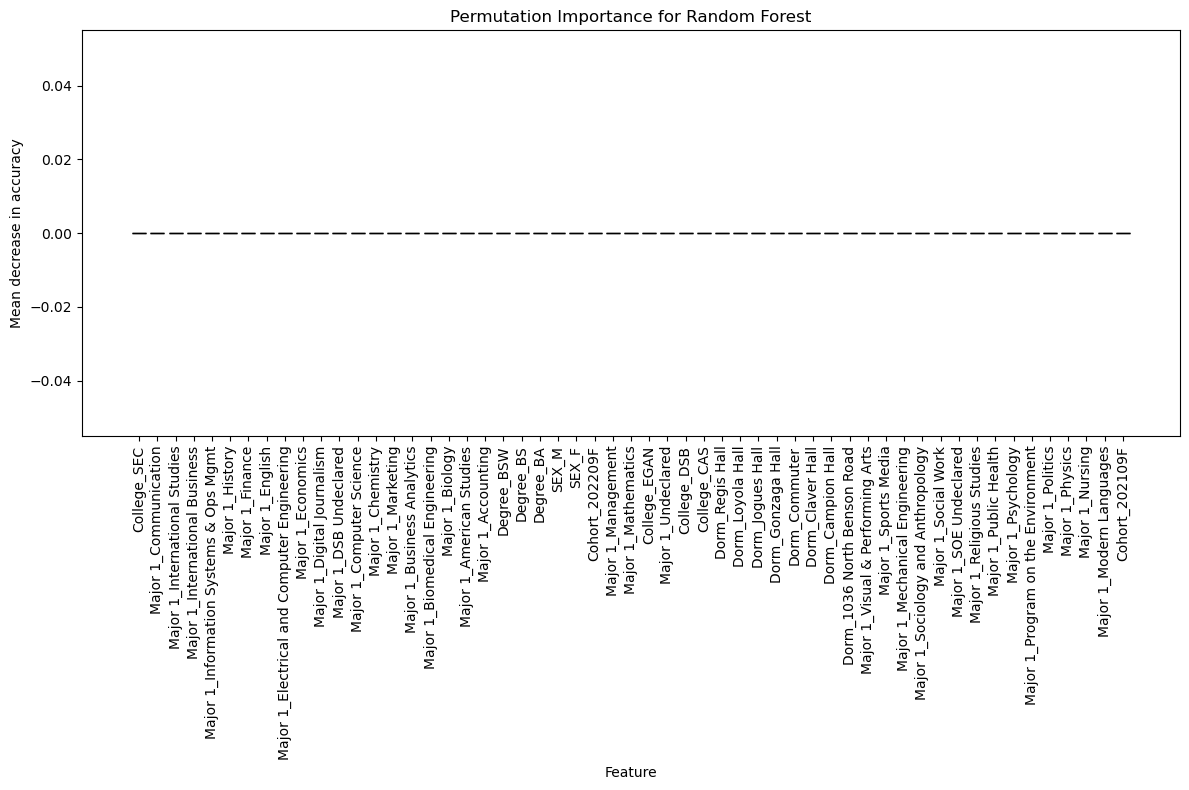

Most important feature: Cohort_202109F
Importance value: 0.0


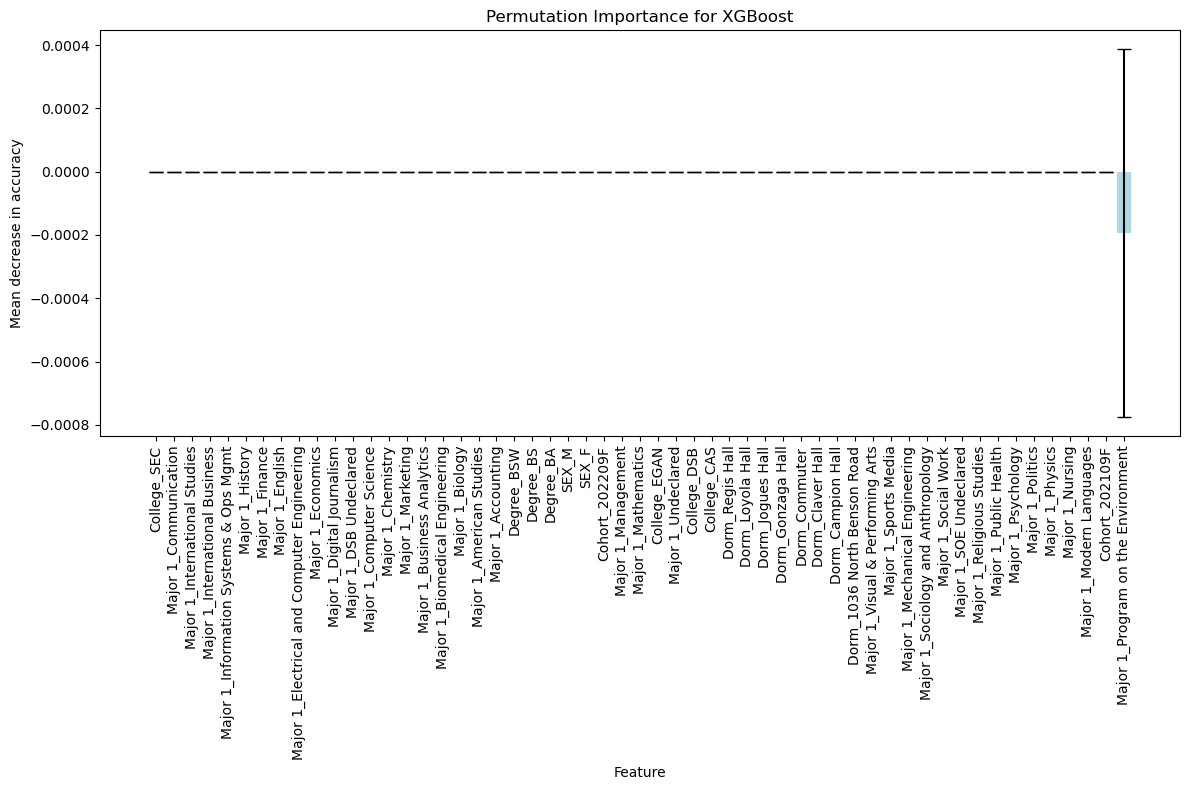

Most important feature: Cohort_202109F
Importance value: 0.0


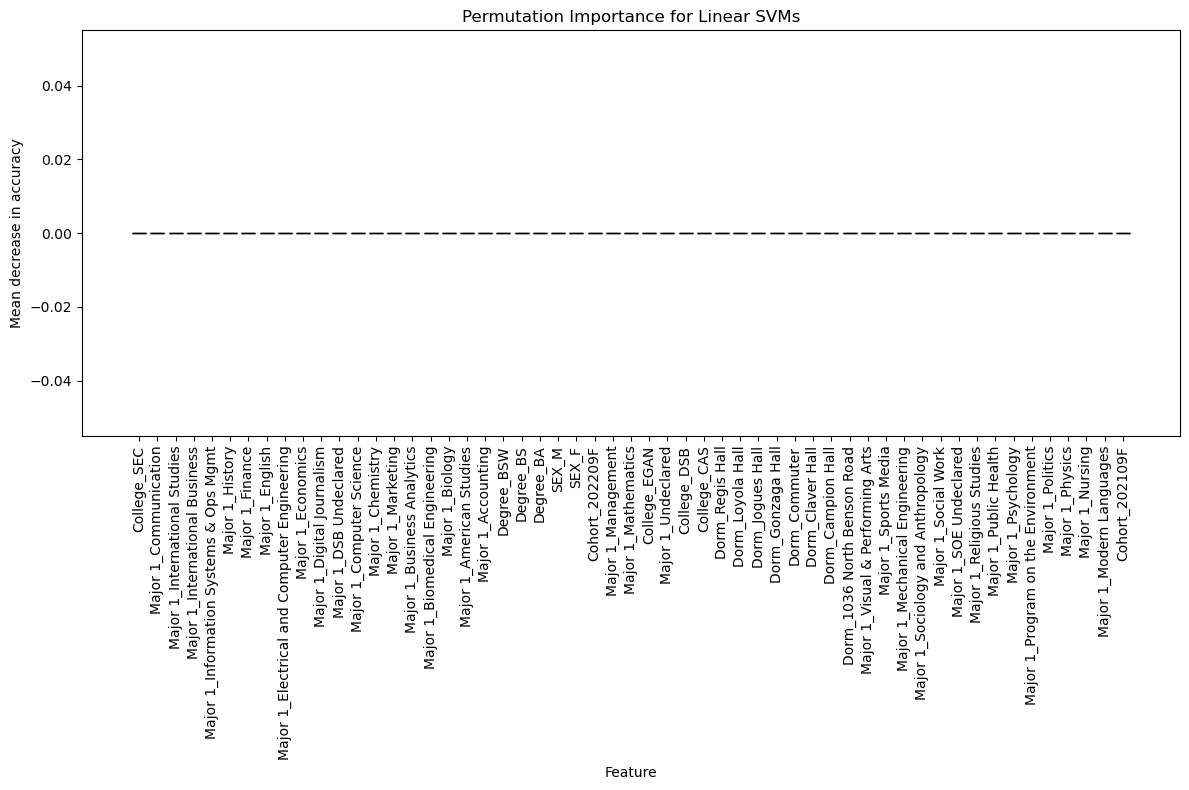

Most important feature: Cohort_202109F
Importance value: 0.0


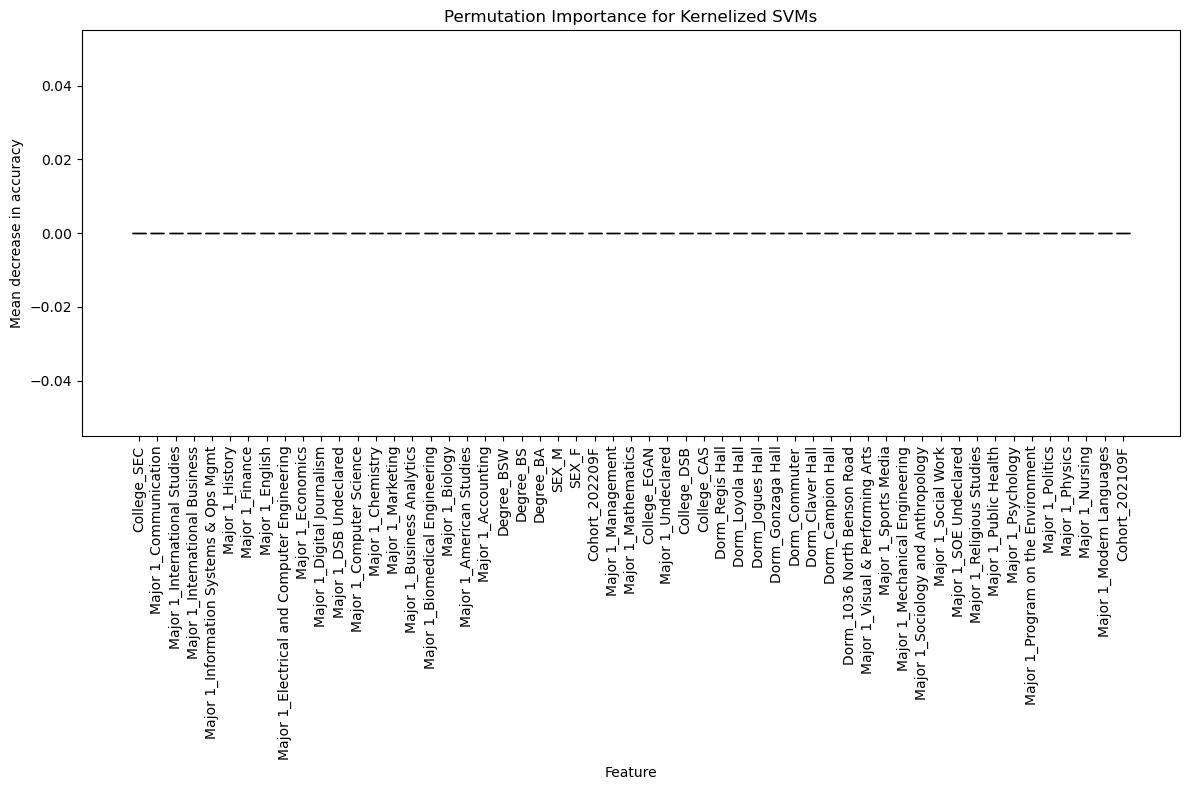

Most important feature: Cohort_202109F
Importance value: 0.0


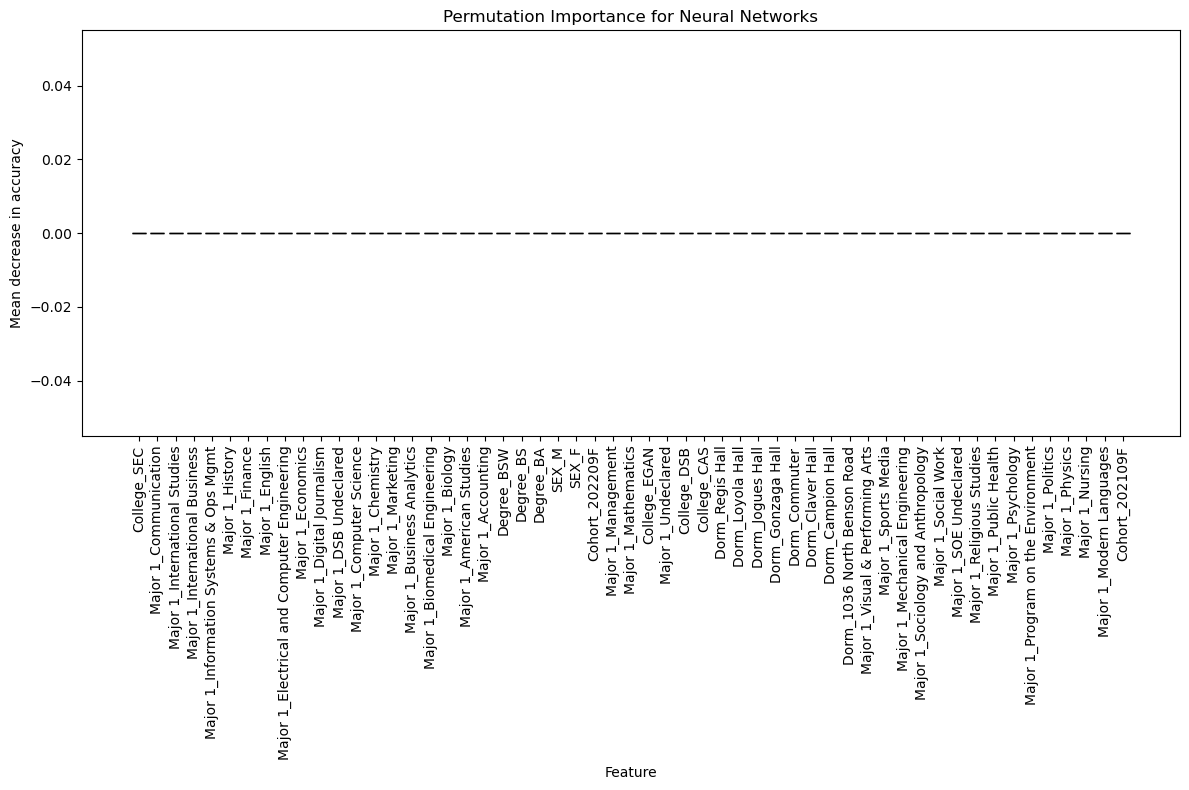

Most important feature: Cohort_202109F
Importance value: 0.0


In [111]:
#KNN
important_feature, importance_value = calculate_permutation_importance(knc, X_test, y_test, 'k-NNs', important_features_permutation2)
print("Most important feature:", important_feature)
print("Importance value:", importance_value)

#Logistic Regression
important_feature, importance_value = calculate_permutation_importance(lr, X_test, y_test, 'Logistic Regression', important_features_permutation2)
print("Most important feature:", important_feature)
print("Importance value:", importance_value)

#Decision Trees
important_feature, importance_value = calculate_permutation_importance(dtc, X_test, y_test, 'Decision Trees', important_features_permutation2)
print("Most important feature:", important_feature)
print("Importance value:", importance_value)

#Random Forest
important_feature, importance_value = calculate_permutation_importance(rfc, X_test, y_test, 'Random Forest', important_features_permutation2)
print("Most important feature:", important_feature)
print("Importance value:", importance_value)

#XGBoost
important_feature, importance_value = calculate_permutation_importance(xgbc, X_test, y_test, 'XGBoost', important_features_permutation2)
print("Most important feature:", important_feature)
print("Importance value:", importance_value)

#Linear SVMs
important_feature, importance_value = calculate_permutation_importance(lsvc, X_test, y_test, 'Linear SVMs', important_features_permutation2)
print("Most important feature:", important_feature)
print("Importance value:", importance_value)

#Kernelized SVMs
important_feature, importance_value = calculate_permutation_importance(svc, X_test, y_test, 'Kernelized SVMs', important_features_permutation2)
print("Most important feature:", important_feature)
print("Importance value:", importance_value)

#Neural Networks
important_feature, importance_value = calculate_permutation_importance(mlpc, X_test, y_test, 'Neural Networks', important_features_permutation2)
print("Most important feature:", important_feature)
print("Importance value:", importance_value)


## **4. Clustering**

## **5. Conclusion**

#### In this project, we developed a machine learning model to predict the likelihood of university students dropping out after their first year. Additionally, we performed a clustering analysis to explore the underlying patterns among students and identify distinct groups that share common characteristics. Our analysis uncovered important trends and actionable insights, revealing specific factors that significantly impact student retention rates.

## **Key Findings:**
### Academic Performance:
- Our statistical analysis revealed that students who drop out tend to have significantly lower GPA and credit hours compared to their peers who remain enrolled.
- These findings were corroborated in our classification model, where GPA and credit hours were among the features with the highest predictive importance.
### Credit Hour Impact:
- The classification model demonstrated a notable drop in performance when credit hours were excluded as a predictive feature, underscoring their crucial role in distinguishing at-risk students.
### Clustering Analysis:
- The clustering analysis helped uncover distinctive patterns and groups among students, providing deeper insights into the profiles of those at risk of dropping out.
- This analysis revealed that students with low GPA and credit hours tend to cluster together, indicating common risk factors.

## **Recommendations:**
### Early Intervention:
- Identifying students with low credit hours during their first semester is vital for early intervention.
Resources should be allocated to support these students, encouraging them to increase their credit hours in the following semester.
### Tailored Support:
- Advisors and academic support staff should prioritize creating personalized retention plans to address low credit hours, helping students balance their coursework while ensuring their satisfaction and integration within the university community.
### Holistic Approach:
- Providing students with comprehensive support, including academic advising, counseling, and extracurricular opportunities, will help them feel more connected to the institution and improve retention rates.

#### By focusing on these recommendations, Fairfield University can strengthen its student retention strategy and create an environment where students thrive academically and personally. The combination of predictive modeling and clustering analysis offers a powerful toolkit to guide these efforts and improve retention rates.
